In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [63]:
nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_07Jul.csv")
nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_07Jul.csv")
#nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")

nue_nue_allsel_vars_tot = defaultdict(list)
nue_nue_allsel_weights_tot = defaultdict(list)


nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
nue_nue_allsel_vars_tot.pop("Unnamed: 0")
nue_nue_allsel_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_nue_allsel_vars_tot.keys():
    if len(nue_nue_allsel_weights_tot[c][0]) > 2:
        nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
        nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
        nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_allsel_vars_tot.keys():
    if len(nue_nue_allsel_vars_tot[c][0]) > 2:
        nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
        nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
        nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_nue_allsel_vars_tot.pop(i)
    nue_nue_allsel_weights_tot.pop(i)
    
###############################################################

nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv")
nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv")
#nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")

nue_nue_sigsel_vars_tot = defaultdict(list)
nue_nue_sigsel_weights_tot = defaultdict(list)


nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_nue_sigsel_vars_tot.keys():
    if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
        nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
        nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
        nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_sigsel_vars_tot.keys():
    if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
        nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
        nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
        nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_nue_sigsel_vars_tot.pop(i)
    nue_nue_sigsel_weights_tot.pop(i)
    
###############################################################

nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_mc_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_mc_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_vars_tot = defaultdict(list)
nue_mc_weights_tot = defaultdict(list)


nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
nue_mc_vars_tot.pop("Unnamed: 0")
nue_mc_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot.keys():
    if len(nue_mc_weights_tot[c][0]) > 2:
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
        nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot.keys():
    if len(nue_mc_vars_tot[c][0]) > 2:
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
        nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot.pop(i)
    nue_mc_weights_tot.pop(i)
    
###############################################################

nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")

nue_dirt_vars_tot = defaultdict(list)
nue_dirt_weights_tot = defaultdict(list)


nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
nue_dirt_vars_tot.pop("Unnamed: 0")
nue_dirt_weights_tot.pop("Unnamed: 0")

#print(nue_dirt_vars_tot[c][0])

poplist = []

for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_weights_tot[c][0]) > 2:
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
        nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_vars_tot[c][0]) > 2:
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
        nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot.pop(i)
    nue_dirt_weights_tot.pop(i)
    
print(nue_dirt_vars_tot)
    
###############################################################

nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_ext_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_ext_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")


nue_ext_vars_tot = defaultdict(list)
nue_ext_weights_tot = defaultdict(list)


nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
nue_ext_vars_tot.pop("Unnamed: 0")
nue_ext_weights_tot.pop("Unnamed: 0")

#print(nue_ext_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_data_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_data_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")


nue_data_vars_tot = defaultdict(list)
nue_data_weights_tot = defaultdict(list)


nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
nue_data_vars_tot.pop("Unnamed: 0")
nue_data_weights_tot.pop("Unnamed: 0")

print(nue_data_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_07Jul.csv")
numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_07Jul.csv")

numu_mc_allsel_vars_tot = defaultdict(list)
numu_mc_allsel_weights_tot = defaultdict(list)


numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
numu_mc_allsel_vars_tot.pop("Unnamed: 0")
numu_mc_allsel_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_mc_allsel_vars_tot.keys():
    if len(numu_mc_allsel_weights_tot[c][0]) > 2:
        numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
        numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
        numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_allsel_vars_tot.keys():
    if len(numu_mc_allsel_vars_tot[c][0]) > 2:
        numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
        numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
        numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_mc_allsel_vars_tot.pop(i)
    numu_mc_allsel_weights_tot.pop(i)
    
###############################################################

numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv")
numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv")

numu_mc_sigsel_vars_tot = defaultdict(list)
numu_mc_sigsel_weights_tot = defaultdict(list)


numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_mc_sigsel_vars_tot.keys():
    if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
        numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
        numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
        numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_sigsel_vars_tot.keys():
    if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
        numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
        numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
        numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_mc_sigsel_vars_tot.pop(i)
    numu_mc_sigsel_weights_tot.pop(i)
    
###############################################################

numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_vars_tot = defaultdict(list)
numu_dirt_weights_tot = defaultdict(list)


numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
numu_dirt_vars_tot.pop("Unnamed: 0")
numu_dirt_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_weights_tot[c][0]) > 2:
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
        numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_vars_tot[c][0]) > 2:
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
        numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot.pop(i)
    numu_dirt_weights_tot.pop(i) 
    
###############################################################

numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_ext_vars_tot = defaultdict(list)
numu_ext_weights_tot = defaultdict(list)

numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
numu_ext_vars_tot.pop("Unnamed: 0")
numu_ext_weights_tot.pop("Unnamed: 0")

    
###############################################################

numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_data_vars_tot = defaultdict(list)
numu_data_weights_tot = defaultdict(list)


numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
numu_data_vars_tot.pop("Unnamed: 0")
numu_data_weights_tot.pop("Unnamed: 0")

print(numu_data_vars_tot)

{'4': {0: [0.25621256]}}
{'0': {0: 21, 1: 26, 2: 7, 3: 4, 4: 2, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}}
{'0': {0: 337, 1: 927, 2: 469, 3: 227, 4: 96, 5: 49, 6: 25, 7: 15, 8: 6, 9: 8}}


In [64]:
import csv

#with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
#with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_sigsel_stat_errs = list(csv_reader)

for a in range(len(nue_nue_sigsel_stat_errs)):
    nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])
    
print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_sigsel_stat_errs_selected = list(csv_reader)

for a in range(len(nue_nue_sigsel_stat_errs_selected)):
    nue_nue_sigsel_stat_errs_selected[a] = float(nue_nue_sigsel_stat_errs_selected[a][0])
    
print("nue_nue_sigsel_stat_errs_selected = ", nue_nue_sigsel_stat_errs_selected)
print("")

################################################

with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_notsigsel_stat_errs = list(csv_reader)

for a in range(len(nue_nue_notsigsel_stat_errs)):
    nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])
    
print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_notsigsel_stat_errs_selected = list(csv_reader)

for a in range(len(nue_nue_notsigsel_stat_errs_selected)):
    nue_nue_notsigsel_stat_errs_selected[a] = float(nue_nue_notsigsel_stat_errs_selected[a][0])
    
print("nue_nue_notsigsel_stat_errs_selected = ", nue_nue_notsigsel_stat_errs_selected)
print("")

################################################

#with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs = list(csv_reader)

for a in range(len(nue_mc_stat_errs)):
    nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])
    
print("nue_mc_stat_errs = ", nue_mc_stat_errs)

#with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs_selected = list(csv_reader)

for a in range(len(nue_mc_stat_errs_selected)):
    nue_mc_stat_errs_selected[a] = float(nue_mc_stat_errs_selected[a][0])
    
print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

print("")

###################################################

with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs = list(csv_reader)

for a in range(len(nue_dirt_stat_errs)):
    nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])
    
print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(nue_dirt_stat_errs_selected)):
    nue_dirt_stat_errs_selected[a] = float(nue_dirt_stat_errs_selected[a][0])
    
print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

print("")
###################################################

with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_ext_stat_errs = list(csv_reader)

for a in range(len(nue_ext_stat_errs)):
    nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])
    
print("nue_ext_stat_errs = ", nue_ext_stat_errs)
print("")
################################################

with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_sigsel_stat_errs = list(csv_reader)

for a in range(len(numu_mc_sigsel_stat_errs)):
    numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])
    
print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)

with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_sigsel_stat_errs_selected = list(csv_reader)

for a in range(len(numu_mc_sigsel_stat_errs_selected)):
    numu_mc_sigsel_stat_errs_selected[a] = float(numu_mc_sigsel_stat_errs_selected[a][0])
    
print("numu_mc_sigsel_stat_errs_selected = ", numu_mc_sigsel_stat_errs_selected)

print("")

###################################################

with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_notsigsel_stat_errs = list(csv_reader)

for a in range(len(numu_mc_notsigsel_stat_errs)):
    numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])
    
print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_notsigsel_stat_errs_selected = list(csv_reader)

for a in range(len(numu_mc_notsigsel_stat_errs_selected)):
    numu_mc_notsigsel_stat_errs_selected[a] = float(numu_mc_notsigsel_stat_errs_selected[a][0])
    
print("numu_mc_notsigsel_stat_errs_selected = ", numu_mc_notsigsel_stat_errs_selected)

print("")

###################################################

with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs = list(csv_reader)

for a in range(len(numu_dirt_stat_errs)):
    numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])
    
print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(numu_dirt_stat_errs_selected)):
    numu_dirt_stat_errs_selected[a] = float(numu_dirt_stat_errs_selected[a][0])
    
print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)
print("")

###################################################

with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_ext_stat_errs = list(csv_reader)

for a in range(len(numu_ext_stat_errs)):
    numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])
    
print("numu_ext_stat_errs = ", numu_ext_stat_errs)

nue_nue_sigsel_stat_errs =  [0.0809660569470748, 0.22769493744068198, 0.08146104594151107, 0.021708803041704774, 0.007849111197489348, 0.0024749449721813256, 0.0010606907023634254, 0.0004949889944362651, 7.071271349089502e-05, 7.071271349089502e-05]
nue_nue_sigsel_stat_errs_selected =  [10.449223518371582, 31.0782470703125, 11.142671585083008, 2.720818042755127, 1.0626423358917236, 0.32601994276046753, 0.13695140182971954, 0.05996596813201904, 0.009515323676168919, 0.009656953625380993]

nue_nue_notsigsel_stat_errs =  [0.006364144214180553, 0.029416488812212333, 0.01619321138941496, 0.0064348569276714476, 0.002757795826144906, 0.0007071271349089503, 0.0005657017079271602, 0.0002828508539635801, 0.0, 0.0]
nue_nue_notsigsel_stat_errs_selected =  [0.9255970120429993, 3.9531962871551514, 1.946923851966858, 0.7985843420028687, 0.3514040410518646, 0.07013564556837082, 0.05893079936504364, 0.039093323051929474, 0.0, 0.0]

nue_mc_stat_errs =  [0.24911501385770116, 0.22713427734084515, 0.051288

In [65]:
with open('numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_detsys_errs = list(csv_reader)

for a in range(len(numu_detsys_errs)):
    numu_detsys_errs[a] = float(numu_detsys_errs[a][0])
    
print("numu_detsys_errs = ", numu_detsys_errs)

######################################################

with open('numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_frac_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_detsys_frac_errs = list(csv_reader)

for a in range(len(numu_detsys_frac_errs)):
    numu_detsys_frac_errs[a] = float(numu_detsys_frac_errs[a][0])
    
print("numu_detsys_frac_errs = ", numu_detsys_frac_errs)

numu_detsys_errs =  [4058.176954005131, 2151.058846659437, 523.9071320808803, 514.3039800686729, 202.18606894870166, 429.1386304731453, 149.7085615466704, 79.92089319208966, 15.489932549471899, 9.05574525995496]
numu_detsys_frac_errs =  [0.1652812827666995, 0.05516277509389582, 0.07678802706487704, 0.3275156944925268, 0.7797445416519324, 7.073033011637797, 7.215427245991039, 9.415285033458241, 7.257627852909748, 6617469081336.865]


In [66]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

[[4.13433643e+01 1.08861993e+02 6.27094321e+01 3.58590556e+01
  1.62779536e+01 6.71705775e+00 2.81939604e+00 1.95760446e+00
  9.37703535e-01 5.40960587e-02]
 [1.08861993e+02 3.24346899e+02 1.94246102e+02 1.02040116e+02
  4.68900724e+01 2.16066913e+01 9.19934153e+00 5.79581135e+00
  2.86834804e+00 6.89987154e-01]
 [6.27094321e+01 1.94246102e+02 1.40249519e+02 7.45697899e+01
  3.63305253e+01 2.03106323e+01 9.15534523e+00 4.85031772e+00
  2.46430321e+00 1.81416758e+00]
 [3.58590556e+01 1.02040116e+02 7.45697899e+01 4.37662884e+01
  2.14370500e+01 1.18727674e+01 5.44206366e+00 2.93822025e+00
  1.53455938e+00 1.05386100e+00]
 [1.62779536e+01 4.68900724e+01 3.63305253e+01 2.14370500e+01
  1.09313524e+01 6.38835550e+00 2.97082775e+00 1.52956635e+00
  8.15092371e-01 6.79488184e-01]
 [6.71705775e+00 2.16066913e+01 2.03106323e+01 1.18727674e+01
  6.38835550e+00 4.30890225e+00 2.03974235e+00 9.46233314e-01
  5.37858780e-01 5.94793426e-01]
 [2.81939604e+00 9.19934153e+00 9.15534523e+00 5.44206366e

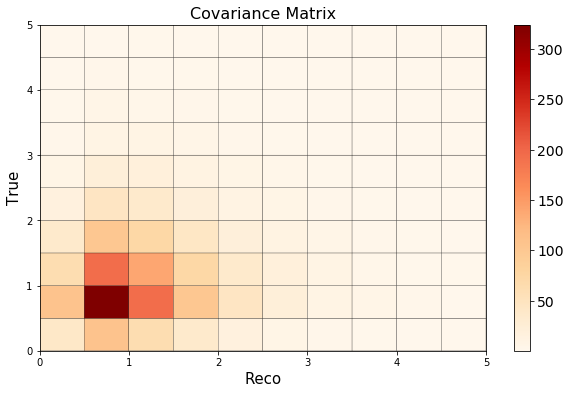

In [67]:
import csv
import numpy as np

#############################
#### nue_nue ################
#############################
#with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_3GeV.csv', 'r') as read_obj:
with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_ppfx = list(csv_reader)   
    
with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_ppfx = list(csv_reader)


with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_genie = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_genie = list(csv_reader)

    
with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_geo = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

###########################################################################################

#############################
#### nue_mc ################
#############################
#with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_ppfx = list(csv_reader)   
    
#with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_ppfx = list(csv_reader)


#with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_genie = list(csv_reader)
    
#with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_genie = list(csv_reader)

    
#with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
#with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
#with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_geo = list(csv_reader)
    
#with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

###########################################################################################

#############################
#### nue_dirt ################
#############################
#with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_3GeV.csv', 'r') as read_obj:
with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ns_ppfx = list(csv_reader)   
    
with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ncvs_ppfx = list(csv_reader)


with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ns_genie = list(csv_reader)
    
with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ncvs_genie = list(csv_reader)

    
with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ns_geo = list(csv_reader)
    
with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

###########################################################################################

#############################
#### numu_mc ################
#############################
with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_ppfx = list(csv_reader)   
    
with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_ppfx = list(csv_reader)


with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_genie = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_genie = list(csv_reader)

    
with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_reint = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_reint = list(csv_reader)   
    
    
with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_geo = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_geo = list(csv_reader)    

    
    
cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
print(cov_numu_mc_geo)

bins = np.arange(0, 5.5, 0.5)

fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, cov_numu_mc_geo, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

###########################################################################################

#############################
#### numu_dirt ################
#############################
#with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_3GeV.csv', 'r') as read_obj:
with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ns_ppfx = list(csv_reader)   
    
with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ncvs_ppfx = list(csv_reader)


with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ns_genie = list(csv_reader)
    
with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ncvs_genie = list(csv_reader)

    
with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ns_geo = list(csv_reader)
    
with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_final_ncvs_geo = list(csv_reader)    

    
    
cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)

In [68]:
############
### ppfx ###
############

#################################################

nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################
####from earlier typo
nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_ppfx = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv")

nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)



############
### genie ###
############

#################################################

nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines) 

#################################################

numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines) 


############
### reint ###
############

#################################################

nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

############
### geo ###
############

#################################################

nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")
#nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

[1.46609656e+01 3.73751080e+01 1.37277557e+01 3.68510836e+00
 1.45922934e+00 4.08662548e-01 2.09075728e-01 1.19576309e-01
 2.03033201e-02 2.89523075e-02]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


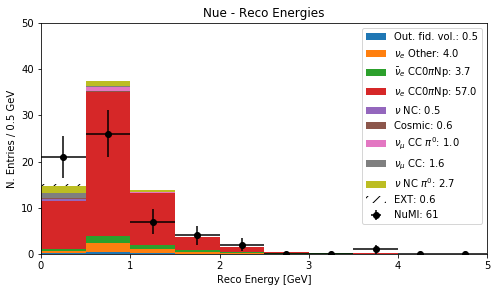

In [69]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_allsel_vars_tot.values())

i = 0
for c in nue_nue_allsel_vars_tot.keys():
    nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot.values())

i = 0
for c in nue_nue_allsel_weights_tot.keys():
    nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot, nue_dirt_vars_tot]
weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot, nue_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_vars_tot[str(0)][0],
            weights=nue_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_data_vars_tot[str(0)].values())
#print(type(nue_data_vars_tot[str(0)].values()))


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])


nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

In [70]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

#print("Rounding to 3dp")
#nue_wanted_list = np.array(nue_wanted_list)
#nue_wanted_list = np.round(nue_wanted_list, 3)
#print(nue_wanted_list)
#nue_wanted_list = list(nue_wanted_list)
#print(nue_wanted_list[0])

print('%.50f' % math.fsum(nue_wanted_list))

#nue_wanted_list = n_nue_tot
#print(nue_wanted_list)
print("")
print(sum(current_total_hist))
#print(sum(sum(n_nue_tot)))

print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

[0.0, 0.0, 0.020303320127453617, 0.0, 0.0, 0.0, 0.0, 0.0]

SUMS
[0.5189284452867611, 4.5427842674436105, 8.288840414744026, 65.3263513407041, 65.79928784005617, 66.38745584236392, 67.3569386569836, 69.00578677475568, 71.69473720763716]
[4.0238558221568494, 3.7460561473004157, 57.03751092596006, 0.47293649935207327, 0.5881680023077536, 0.9694828146196812, 1.6488481177720757, 2.6889504328814837]

Wanted List:
[10.449224075510086, 31.078248422265883, 11.142672530720944, 2.7208182211142926, 1.0626423368548643, 0.3260199520259164, 0.13695140632728453, 0.0804829838961254, 0.020303320127453617, 0.02014767711723664]

57.03751092596008476220958982594311237335205078125000

71.69473720763716
0.7955606387226462


[1.04492241e+01 3.10782484e+01 1.11426725e+01 2.72081822e+00
 1.06264234e+00 3.26019952e-01 1.36951406e-01 5.99659714e-02
 9.51532401e-03 9.65695389e-03]
56.99571519411813369515584781765937805175781250000000



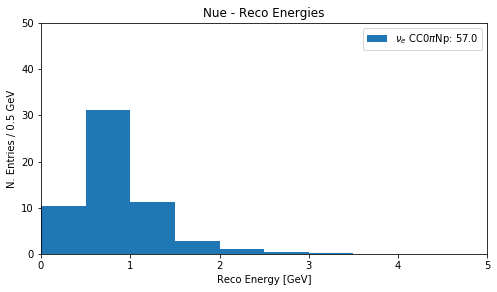

In [71]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_sigsel_vars_tot.values())

i = 0
for c in nue_nue_sigsel_vars_tot.keys():
    nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot.values())

i = 0
for c in nue_nue_sigsel_weights_tot.keys():
    nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
    
varss = [nue_nue_sigsel_vars_tot]
weightss = [nue_nue_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


#current_total_hist = (nue_stacked[0][-1])
current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

Sidenote for unfolding

In [106]:
#Data values
data_values = list(nue_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = nue_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

#print(nue_wanted_list[1:7])

[21 26  7  4  2  0  0  1  0  0]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[-8.88178420e-15 -2.84217094e-14  3.01980663e-14 -3.90798505e-14
 -3.95239397e-14 -1.13797860e-14  1.21846977e-14 -2.05170125e-02
 -1.07879961e-02 -1.04907232e-02]


802

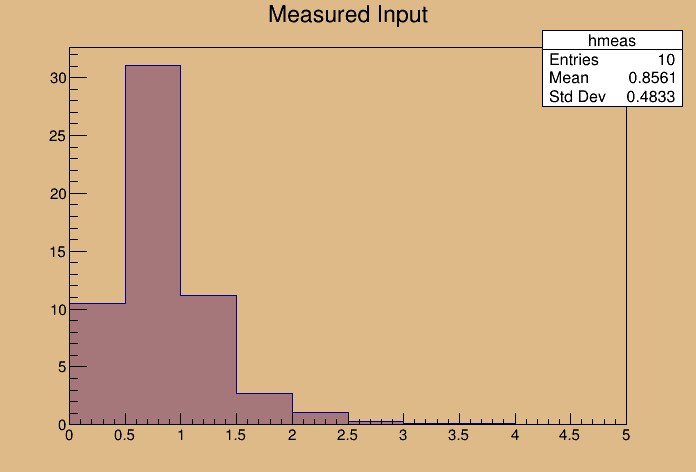

In [10]:
# Create a new canvas, and customize it.
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 42 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )

hfile = gROOT.FindObject( 'WSD_nue_energy_Flip.root' )
if hfile:
    hfile.Close()
hfile = TFile( 'WSD_nue_energy_Flip.root', 'UPDATE', 'Demo ROOT file with histograms' )

# Create some histograms, a profile histogram and an ntuple
hpx    = TH1F( 'hmeas', 'Measured Input', 10, 0, 5 )

# Set canvas/frame attributes.
hpx.SetFillColor( 48 )
gBenchmark.Start( 'hsimple' )
#gStyle.SetErrorX(0.0001)


for a in range(len(nue_wanted_list)):
    hpx.Fill(a/2 + 0.25, nue_wanted_list[a])

hpx.Draw("hist")
hpx.SetFillColor( 0 )
c1.Modified()
c1.Update() 
hpx.SetFillColor( 48 )
c1.Modified()
c1.Update()
c1.Draw()
hfile.Write()

In [11]:
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
#           data_signal,
#           delimiter =", ", 
#           fmt ='% s')
#---------------------------------------------------------------------------
np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_07Jul.csv", 
           n_nue_tot,
           delimiter =", ", 
           fmt ='% s')
#---------------------------------------------------------------------------
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
#           current_total_hist,
#           delimiter =", ", 
#           fmt ='% s')

## Now do Numu

dict_values([337, 927, 469, 227, 96, 49, 25, 15, 6, 8])
<class 'dict_values'>
[248.22788476 767.16565294 456.9996259  219.08343893 103.56502544
  53.63820734  22.74412143  12.73758945   5.17637252   2.98014955]


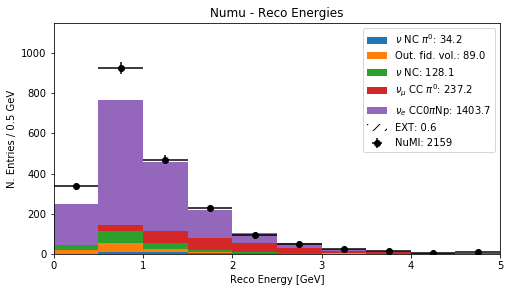

In [72]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    #2: r"$\nu_{\mu}$ CC",
    2: r"$\nu_e$ CC0$\pi$Np",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_allsel_vars_tot.values())

i = 0
for c in numu_mc_allsel_vars_tot.keys():
    numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_allsel_weights_tot.values())

i = 0
for c in numu_mc_allsel_weights_tot.keys():
    numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_allsel_vars_tot, numu_dirt_vars_tot]
weightss = [numu_mc_allsel_weights_tot, numu_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_vars_tot[str(0)][0],
            weights=numu_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot[str(0)].values())
print(type(numu_data_vars_tot[str(0)].values()))

numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=numu_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot

numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [73]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


wanted_key = 3

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

#numu_wanted_list = n_numu_tot

[0.17136450167961925, 0.08640159226006006, 3.1651091726604363, 1.2559244424862754]

SUMS
[34.20059246618968, 123.21173347655778, 251.3589273113318, 488.5712097036868, 1892.3180682664745]
[89.0111410103681, 128.14719383477401, 237.212282392355, 1403.7468585627876]

Wanted List:
[203.89679740419228, 625.5535980244445, 344.67871694402925, 139.27568142486894, 52.08919413478384, 22.53891201849865, 8.164724276433162, 5.789297457048406, 1.2559244424862754, 0.5040124360023128]



[1.97757239e+02 5.03877125e+02 1.71203627e+02 4.71697681e+01
 1.43198401e+01 3.47640571e+00 8.27352946e-01 3.03658017e-01
 1.01967167e-01 1.26867741e-01]


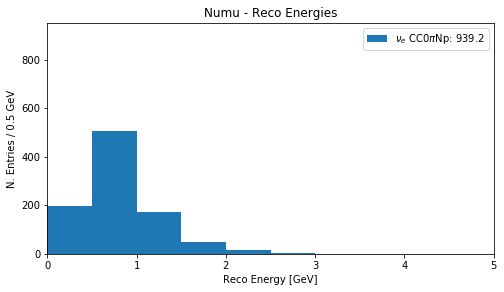

In [74]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    #2: r"$\nu_{\mu}$ CC",
    2: r"$\nu_e$ CC0$\pi$Np",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_sigsel_vars_tot.values())

i = 0
for c in numu_mc_sigsel_vars_tot.keys():
    numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot.values())

i = 0
for c in numu_mc_sigsel_weights_tot.keys():
    numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
    
varss = [numu_mc_sigsel_vars_tot]
weightss = [numu_mc_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0])


numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25


#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0])
print(n_numu_tot)

numu_ax1.set_ylim([0, 950])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

Sidenote for unfolding

In [63]:
#Data values
data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = numu_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 820 1053  380  117   39   13    4    2    5    0]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[150.44297975 215.65001771 119.92778022  54.69033769  19.74380454
   8.26034846   3.90713154   1.70821789   0.74112804   0.48774117]


In [14]:
np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_07Jul.csv", 
           n_numu_tot,
           delimiter =", ", 
           fmt ='% s')

## Ratio Plot


bin_ratios:
[0.052838642641222684, 0.061678228411253734, 0.06508432504894746, 0.05768139915077458, 0.07420769581323838, 0.09378075503088204, 0.16552960499896063, 0.19747863704596139, 0.09331752868523141, 0.07611827731756887]


bin_allsel_ratios:
[0.05906252479322565, 0.04871843242723391, 0.030038877275993903, 0.01682057016326682, 0.014089981962374895, 0.007618870353576273, 0.009192517228069387, 0.009387671739357777, 0.003922306605873838, 0.009715051890580662]


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [0.052838642641222684, 0.061678228411253734, 0.06508432504894746, 0.05768139915077458, 0.07420769581323838, 0.09378075503088204, 0.16552960499896063, 0.19747863704596139, 0.09331752868523141, 0.07611827731756887]



Text(0.5, 1.0, 'Ratio')

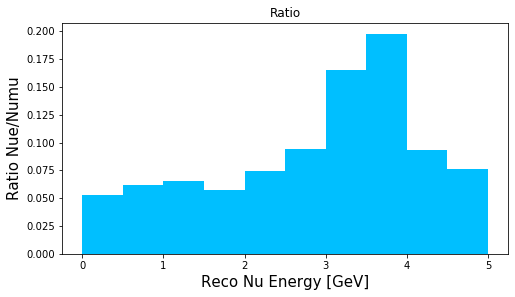

In [75]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

nue_ratio_nums = n_nue_tot
numu_ratio_nums = n_numu_tot

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

rbin_allsel_ratios = []

nue_allsel_ratio_nums = n_nue_tot_allsel
numu_allsel_ratio_nums = n_numu_tot_allsel

for i in range(len(numu_allsel_ratio_nums)):
    if nue_allsel_ratio_nums[i] > 0 and numu_allsel_ratio_nums[i] > 0:
        rratio = nue_allsel_ratio_nums[i]/numu_allsel_ratio_nums[i]
        rbin_allsel_ratios.append(rratio)
    else:
        rbin_allsel_ratios.append(0)

print("")
print("bin_allsel_ratios:")
print(rbin_allsel_ratios)
print("")

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('Reco Nu Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [76]:

nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
nue_mc_stat_errs = np.array(nue_mc_stat_errs)
nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
nue_ext_stat_errs = np.array(nue_ext_stat_errs)

numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
numu_ext_stat_errs = np.array(numu_ext_stat_errs)


numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [77]:
# Merge the backgrounds from nue and mc stat errors

errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################

numu_nue_mc_bkg_stat_errs = numu_mc_notsigsel_stat_errs
print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [0.2554791580718817, 0.2565507661530575, 0.06748159659541225, 0.021088681272242102, 0.010084707998430234, 0.0007071271349089503, 0.0005657017079271602, 0.0002828508539635801, 0.0, 0.0]

total errs numu =  [ 5.03358866 24.02494501 24.86753991 15.26928497  7.5833541   4.00782096
  1.83905496  1.05507535  0.45426855  0.28574957]


In [78]:
nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs)
totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs
#totalstat_nue = totalstat_nue
print("totalstat_nue ",totalstat_nue )
print("nue_exp_err ", nue_exp_err)
print("")

numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs)
totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs
print("totalstat_numu ",totalstat_numu )
print("numu_exp_err ", numu_exp_err)
print("")


totalstat_nue  [1.09394831e+00 4.84245704e-01 1.48942643e-01 4.27974843e-02
 1.79338192e-02 3.18207211e-03 1.62639241e-03 7.77839848e-04
 7.07127135e-05 7.07127135e-05]
nue_exp_err  [1.04591984 0.69587765 0.38593088 0.20687553 0.13391721 0.05640986
 0.04032856 0.02788978 0.00840909 0.00840909]

totalstat_numu  [29.67150984 78.31610046 43.9197012  22.55628786 10.77218986  5.11909085
  2.70957425  2.14382508  1.21073414  1.35251856]
numu_exp_err  [5.44715612 8.84963844 6.62719407 4.74934605 3.28210144 2.2625408
 1.64607845 1.46418069 1.10033365 1.16297832]



In [79]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])
#nue_cov           = np.zeros([6, 6])
#nue_cov_mc_stat   = np.zeros([6, 6])
#nue_cov_mc_detsys = np.zeros([6, 6])
#nue_cov_data_stat = np.zeros([6, 6])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(nue_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [80]:
nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot_allsel**2) # this should be the number of the full all sel plot
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot_allsel**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.diag(ratio_cov_mc_stat))

nue_cov_mc_stat =  [1.09394831e+00 4.84245704e-01 1.48942643e-01 4.27974843e-02
 1.79338192e-02 3.18207211e-03 1.62639241e-03 7.77839848e-04
 7.07127135e-05 7.07127135e-05]
numu_cov_mc_stat =  [29.67150984 78.31610046 43.9197012  22.55628786 10.77218986  5.11909085
  2.70957425  2.14382508  1.21073414  1.35251856]
ratio_cov_mc_stat =  [1.55538156e-05 1.82497337e-06 4.23870295e-06 1.20490835e-05
 5.19098777e-05 1.83222911e-04 1.16297884e-03 2.63677989e-03
 1.88727239e-03 1.37113345e-03]


In [81]:
#12.2% fractional value being added
#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

nue_detsys_errs = 0.014884*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = 0.005184*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot_allsel
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################

squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_detsys)/(n_nue_tot_allsel**2) # this should be the number of the full all sel plot
dnumu = np.diag(numu_cov_mc_detsys)/(n_numu_tot_allsel**2)
rratio_detsys_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_detsys[np.diag_indices_from(ratio_cov_mc_detsys)]     = rratio_detsys_errs
print("ratio_cov_mc_stat = ", np.diag(ratio_cov_mc_detsys))

nue_cov_mc_detsys =  [3.19922519e+00 2.07914402e+01 2.80490879e+00 2.02125071e-01
 3.16932494e-02 2.48570358e-03 6.50619233e-04 2.12818778e-04
 6.13555405e-06 1.24763063e-05]
totalstat_nue_detsys  [3.19922519e+00 2.07914402e+01 2.80490879e+00 2.02125071e-01
 3.16932494e-02 2.48570358e-03 6.50619233e-04 2.12818778e-04
 6.13555405e-06 1.24763063e-05]
nue_detsys_exp_err  [1.78863780e+00 4.55976318e+00 1.67478619e+00 4.49583219e-01
 1.78025980e-01 4.98568308e-02 2.55072388e-02 1.45883096e-02
 2.47700506e-03 3.53218151e-03]
nue_detsys_frac_err  [0.122 0.122 0.122 0.122 0.122 0.122 0.122 0.122 0.122 0.122]

numu_cov_mc_detsys =  [3.19422957e+02 3.05100763e+03 1.08267144e+03 2.48819316e+02
 5.56021039e+01 1.49146650e+01 2.68165759e+00 8.41084223e-01
 1.38904411e-01 4.60406142e-02]
totalstat_numu_detsys  [3.19422957e+02 3.05100763e+03 1.08267144e+03 2.48819316e+02
 5.56021039e+01 1.49146650e+01 2.68165759e+00 8.41084223e-01
 1.38904411e-01 4.60406142e-02]
numu_detsys_exp_err  [17.8724077  55.2

### Now need the systematic errors

In [82]:
#nue_cov = (cov_nue_nue_ppfx[1:7, 1:7] + cov_nue_nue_genie[1:7, 1:7] + cov_nue_nue_reint[1:7, 1:7])
nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
nue_cov += (cov_nue_nue_geo)
nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
nue_cov += (cov_nue_mc_geo)
nue_cov += (cov_nue_dirt_ppfx + cov_nue_dirt_genie + cov_nue_dirt_reint)
nue_cov += (cov_nue_dirt_geo)

numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
numu_cov += (cov_numu_mc_geo)
numu_cov += (cov_numu_dirt_ppfx + cov_numu_dirt_genie + cov_numu_dirt_reint)
numu_cov += (cov_numu_dirt_geo)

Sidenote for Unfolding

In [83]:
print(nue_cov_mc_stat)

[[1.09394831e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.84245704e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.48942643e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.27974843e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.79338192e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.18207211e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [84]:
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_StatOnly.csv", 
#           nue_cov_mc_stat,
#           delimiter =", ", 
#           fmt ='% s')

In [42]:
#print(cov_nue_nue_ppfx)

total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys

total_nue_cov_frac = total_nue_cov / (n_nue_tot_allsel**2)

print(total_nue_cov)
print("")
print(total_nue_cov_frac)

##########################################
total_nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_nue_cov)): 
        for j in range(len(total_nue_cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
                total_nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
                
print("")
print(total_nue_cor)

[[9.97809600e+00 1.63942348e+01 5.98598854e+00 1.48137394e+00
  6.40120139e-01 2.06558135e-01 7.71722028e-02 3.21460197e-02
  5.71914857e-03 1.43988265e-03]
 [1.63942348e+01 7.74459079e+01 2.06400107e+01 5.01170328e+00
  2.44451498e+00 6.80328155e-01 2.27156948e-01 1.03310272e-01
  1.90948506e-02 7.34334803e-03]
 [5.98598854e+00 2.06400107e+01 1.09980074e+01 1.90636324e+00
  9.00751744e-01 2.47119949e-01 7.96680503e-02 3.59946516e-02
  6.75054170e-03 3.03557997e-03]
 [1.48137394e+00 5.01170328e+00 1.90636324e+00 7.75935959e-01
  2.19829435e-01 6.82485773e-02 2.23782995e-02 1.03873027e-02
  2.42281226e-03 7.24609600e-04]
 [6.40120139e-01 2.44451498e+00 9.00751744e-01 2.19829435e-01
  1.81442191e-01 3.25521841e-02 8.28024097e-03 4.64869394e-03
  6.31972382e-04 3.63302251e-04]
 [2.06558135e-01 6.80328155e-01 2.47119949e-01 6.82485773e-02
  3.25521841e-02 1.98560274e-02 3.97830290e-03 2.12463567e-03
  3.87111372e-04 3.00959872e-04]
 [7.71722028e-02 2.27156948e-01 7.96680503e-02 2.23782995e

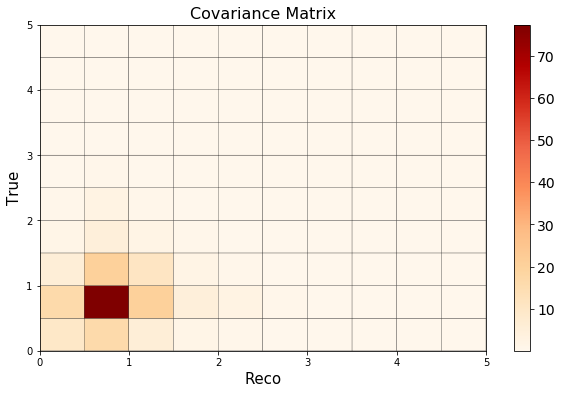

In [37]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

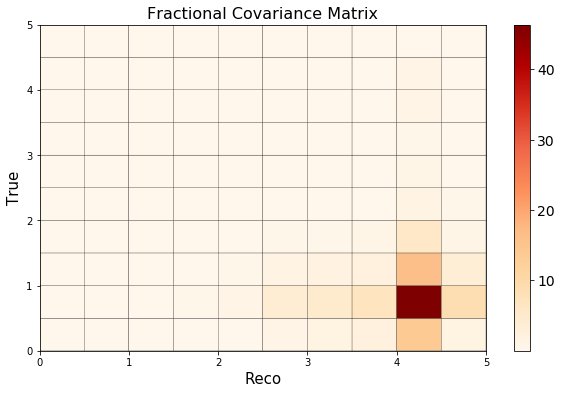

In [38]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov_frac, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Fractional Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

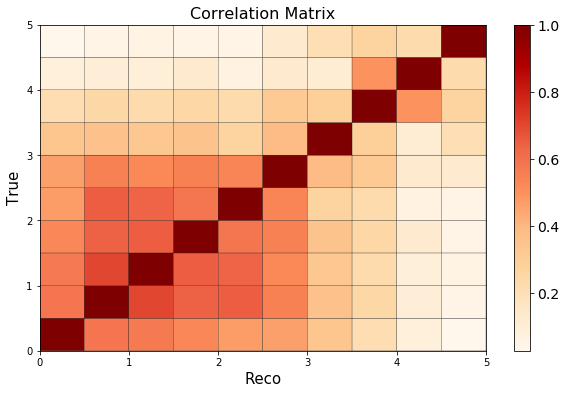

In [45]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cor, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Correlation Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

1902

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


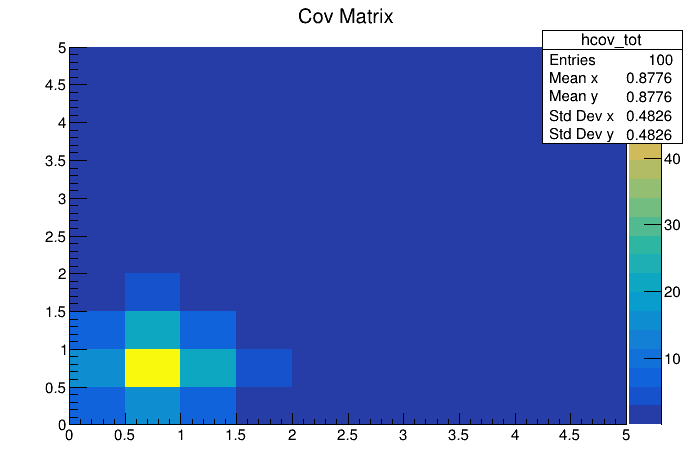

In [23]:
# Create a new canvas, and customize it.
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
#c1.SetFillColor( 42 )
#c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )

hfile = gROOT.FindObject( 'WSD_nue_energy_Flip.root' )
if hfile:
    hfile.Close()
hfile = TFile( 'WSD_nue_energy_Flip.root', 'UPDATE', 'Demo ROOT file with histograms' )

# Create some histograms, a profile histogram and an ntuple
#hpx    = TH1F( 'hpx', 'Prior Truth Input', 10, 0, 5 )
hpxpy  = TH2F( 'hcov_tot', 'Cov Matrix', 10, 0, 5, 10, 0, 5 )

# Set canvas/frame attributes.
hpxpy.SetFillColor( 48 )
gBenchmark.Start( 'hsimple' )
#gStyle.SetErrorX(0.0001)

#hpxpy.Fill(1, 2, 6)
for a in range(len(nue_exp_err)):
    for b in range(len(nue_exp_err)):
        hpxpy.Fill(a/2+0.25, b/2+0.25, total_nue_cov[a, b])
        #print(total_nue_cov[a, b])

hpxpy.Draw("COLZ")
hpxpy.SetFillColor( 0 )
c1.Modified()
c1.Update() 
#hpxpy.SetFillColor( 48 )
c1.Modified()
c1.Update()
c1.Draw()
hfile.Write()

In [25]:
print(total_nue_cov)

np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_07Jul.csv", 
           total_nue_cov,
           delimiter =", ", 
           fmt ='% s')

#---------------------------------------------------------

[[9.97809600e+00 1.63942348e+01 5.98598854e+00 1.48137394e+00
  6.40120139e-01 2.06558135e-01 7.71722028e-02 3.21460197e-02
  5.71914857e-03 1.43988265e-03]
 [1.63942348e+01 7.74459079e+01 2.06400107e+01 5.01170328e+00
  2.44451498e+00 6.80328155e-01 2.27156948e-01 1.03310272e-01
  1.90948506e-02 7.34334803e-03]
 [5.98598854e+00 2.06400107e+01 1.09980074e+01 1.90636324e+00
  9.00751744e-01 2.47119949e-01 7.96680503e-02 3.59946516e-02
  6.75054170e-03 3.03557997e-03]
 [1.48137394e+00 5.01170328e+00 1.90636324e+00 7.75935959e-01
  2.19829435e-01 6.82485773e-02 2.23782995e-02 1.03873027e-02
  2.42281226e-03 7.24609600e-04]
 [6.40120139e-01 2.44451498e+00 9.00751744e-01 2.19829435e-01
  1.81442191e-01 3.25521841e-02 8.28024097e-03 4.64869394e-03
  6.31972382e-04 3.63302251e-04]
 [2.06558135e-01 6.80328155e-01 2.47119949e-01 6.82485773e-02
  3.25521841e-02 1.98560274e-02 3.97830290e-03 2.12463567e-03
  3.87111372e-04 3.00959872e-04]
 [7.71722028e-02 2.27156948e-01 7.96680503e-02 2.23782995e

In [46]:
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

total_numu_cov_frac = total_numu_cov / (n_numu_tot_allsel**2)

print(total_numu_cov)
print("")
print(total_numu_cov_frac)

##########################################
total_numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_numu_cov)): 
        for j in range(len(total_numu_cov[i])): 
            
            if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
                total_numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))
                
print("")
print(total_numu_cor)

[[2.45454364e+03 6.15531688e+03 3.17455528e+03 1.35277077e+03
  5.54622597e+02 2.52501708e+02 9.89800643e+01 4.43035273e+01
  3.28512736e+01 1.05247926e+01]
 [6.15531688e+03 2.30903136e+04 1.12847837e+04 4.94726157e+03
  2.08868136e+03 9.18948136e+02 3.61144692e+02 1.55562432e+02
  1.11136465e+02 3.62160544e+01]
 [3.17455528e+03 1.12847837e+04 8.57590868e+03 3.53023965e+03
  1.53660281e+03 6.87557709e+02 2.70304164e+02 1.22798462e+02
  7.58145569e+01 2.89753795e+01]
 [1.35277077e+03 4.94726157e+03 3.53023965e+03 2.07855101e+03
  8.12795046e+02 3.82102950e+02 1.49989525e+02 7.29302265e+01
  4.05656007e+01 1.69967817e+01]
 [5.54622597e+02 2.08868136e+03 1.53660281e+03 8.12795046e+02
  4.50934024e+02 1.84239518e+02 7.38511532e+01 3.62775225e+01
  1.99038259e+01 8.36515329e+00]
 [2.52501708e+02 9.18948136e+02 6.87557709e+02 3.82102950e+02
  1.84239518e+02 1.16556254e+02 3.79726146e+01 1.94665632e+01
  1.04049271e+01 4.57176235e+00]
 [9.89800643e+01 3.61144692e+02 2.70304164e+02 1.49989525e

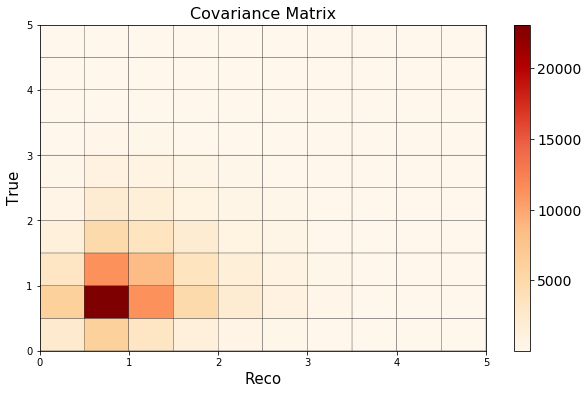

In [47]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

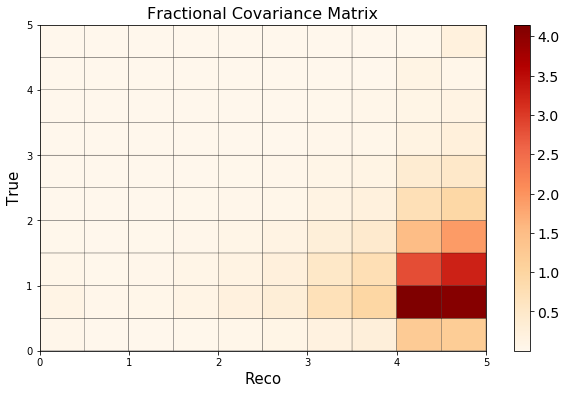

In [48]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov_frac, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Fractional Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

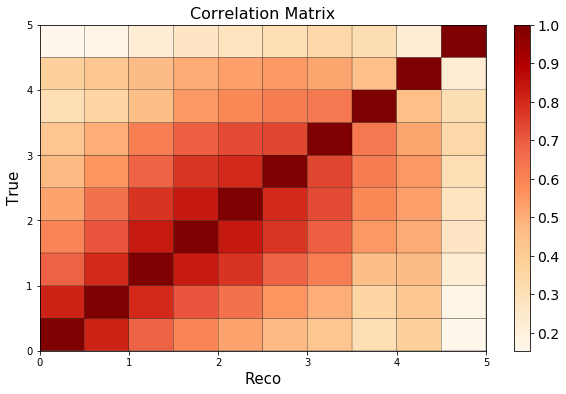

In [49]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cor, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Correlation Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

In [27]:
#print(type(total_numu_cov))

np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_07Jul.csv", 
           total_numu_cov,
           delimiter =", ", 
           fmt ='% s')

#---------------------------------------------------------

End note

In [85]:
print(n_nue_tot)

[1.04492241e+01 3.10782484e+01 1.11426725e+01 2.72081822e+00
 1.06264234e+00 3.26019952e-01 1.36951406e-01 5.99659714e-02
 9.51532401e-03 9.65695389e-03]


In [86]:
total_nue_cov_mat = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_nue_cov_mat_frac = total_nue_cov_mat / n_nue_tot_allsel**2

total_nue_mat_frac = np.sqrt(np.diag(total_nue_cov_mat_frac))
print(total_nue_mat_frac)

[0.21545733 0.23545981 0.24157805 0.23903565 0.29190772 0.34481118
 0.34388254 0.395666   1.04361737 0.55250194]


In [87]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))
nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot#_allsel
print("nue_exp_err_frac_sys ", nue_exp_err_frac_sys)
nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot#_allsel
print("nue_exp_err_frac_stat ", nue_exp_err_frac_stat)
nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot#_allsel
print("nue_exp_err_frac_detsys ", nue_exp_err_frac_detsys)

print("")
print("")
#nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat)))
#add detsys fractional error in quadrature due to statistical fluctuations
#frac_detsys_value = 0.1
#frac_detsys_errors_nue = np.full((len(nue_exp_err)), frac_detsys_value)
#print(frac_detsys_errors_nue)

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))
numu_exp_err_frac_sys = np.sqrt( np.diag((numu_cov)))/ n_numu_tot#_allsel
print("numu_exp_err_frac_sys ", numu_exp_err_frac_sys)
numu_exp_err_frac_stat = np.sqrt( np.diag((numu_cov_mc_stat)))/ n_numu_tot#_allsel
print("numu_exp_err_frac_stat ", numu_exp_err_frac_stat)
numu_exp_err_frac_detsys = np.sqrt( np.diag((numu_cov_mc_detsys)))/ n_numu_tot#_allsel
print("numu_exp_err_frac_detsys ", numu_exp_err_frac_detsys)

print("")
print("")
#nue_exp_err = nue_exp_err * (1 + frac_deysys_value)
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = nue_exp_err / n_nue_tot_allsel                   #wincludes all errors
#nue_frac_err = np.sqrt(nue_frac_err**2 + frac_detsys_errors_nue**2)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot_allsel
print("")
print("numu_frac_err ", numu_frac_err)

nue_exp_err_frac_sys  [0.22818034 0.24115515 0.25453697 0.2678263  0.34166108 0.36535938
 0.39269059 0.58906935 2.02730257 1.36079569]
nue_exp_err_frac_stat  [0.10009546 0.02239115 0.0346354  0.07603431 0.12602284 0.17302579
 0.29447347 0.46509345 0.88374134 0.8707803 ]
nue_exp_err_frac_detsys  [0.17117422 0.1467188  0.15030382 0.16523824 0.16753142 0.1529257
 0.18625029 0.24327647 0.26031747 0.3657656 ]


numu_exp_err_frac_sys  [ 0.23202777  0.28039251  0.50413318  0.90123159  1.36944236  2.82607187
  4.98236818  7.68041775 12.78333103  5.6487796 ]
numu_exp_err_frac_stat  [ 0.02754466  0.01756309  0.03870943  0.10068623  0.22919959  0.6508276
  1.98957223  4.82180809 10.7910584   9.16685603]
numu_exp_err_frac_detsys  [0.09037549 0.10962182 0.19219203 0.33440927 0.52072382 1.1109034
 1.97929644 3.02019505 3.65508657 1.69129493]


nue_exp_err  [3.15881243 8.80033567 3.31632439 0.88087227 0.42596032 0.14091142
 0.07189749 0.04731228 0.0211889  0.01599621]

nue_frac_err  [0.21545733 0.235

### Ratio Sys Errors

In [88]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
#sys errors have been done for individual results with allsel
#nue_central_values = nue_wanted_list
#numu_central_values = numu_wanted_list
nue_central_values = n_nue_tot_allsel
numu_central_values = n_numu_tot_allsel


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_ppfx
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_ppfx_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_ppfx
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_ppfx_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_ppfx_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Nue_dirt

s_n_dirt = nue_dirt_df_ppfx
df_n_dirt = pd.DataFrame(s_n_dirt.values.tolist())

variable_nue_dirt = nue_dirt_df_ppfx_vars.squeeze()
spline_fix_var_nue_dirt = pd.DataFrame(nue_dirt_df_ppfx_splines)
spline_fix_var_nue_dirt = spline_fix_var_nue_dirt.squeeze()

##Numu
s_m = numu_mc_df_ppfx
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_ppfx_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()

##Numu dirt

s_m_dirt = numu_dirt_df_ppfx
df_m_dirt = pd.DataFrame(s_m_dirt.values.tolist())

variable_numu_dirt = numu_dirt_df_ppfx_vars.squeeze()
spline_fix_var_numu_dirt = pd.DataFrame(numu_dirt_df_ppfx_splines)
spline_fix_var_numu_dirt = spline_fix_var_numu_dirt.squeeze()

n_test, bins = np.histogram(
            variable_nue, weights=spline_fix_var_nue, range=x_range, bins=n_bins)

##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        weight_n_dirt = df_n_dirt[i].values / 1000.
        weight_n_dirt[np.isnan(weight_n_dirt)] = 1
        weight_n_dirt[weight_n_dirt > 100] = 1
        weight_n_dirt[weight_n_dirt < 0] = 1
        weight_n_dirt[weight_n_dirt == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        weight_m_dirt = df_m_dirt[i].values / 1000.
        weight_m_dirt[np.isnan(weight_m_dirt)] = 1
        weight_m_dirt[weight_m_dirt > 100] = 1
        weight_m_dirt[weight_m_dirt < 0] = 1
        weight_m_dirt[weight_m_dirt == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        n_n_dirt, bins = np.histogram(
            variable_nue_dirt.reshape(1, ), weights=weight_n_dirt*spline_fix_var_nue_dirt, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
        n_m_dirt, bins = np.histogram(
            variable_numu_dirt, weights=weight_m_dirt*spline_fix_var_numu_dirt, range=x_range, bins=n_bins)
        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0 or n_n_dirt[g] > 0) and (n_m[g] or n_m_dirt[g]) > 0:
                rratio = (n_n[g] + n_n_mc[g] + n_n_dirt[g])/(n_m[g] + n_m_dirt[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[ 2.12921216e-05  1.29647429e-05 -1.58908148e-08 -4.78537818e-07
   4.99472764e-07 -4.92575834e-06 -3.00283355e-07 -3.85789655e-06
   1.02009364e-06  6.99996135e-07]
 [ 1.29647429e-05  9.36726579e-06  3.13500156e-07 -1.72931769e-07
   4.96443417e-07 -3.09205862e-06  1.06810359e-07 -2.19620266e-06
   7.63122898e-07  1.13474612e-06]
 [-1.58908148e-08  3.13500156e-07  1.43497654e-06  2.50488135e-07
   2.69103212e-07  3.51350829e-07  4.43943174e-07  3.07414297e-07
  -5.00744173e-07  9.76700806e-07]
 [-4.78537818e-07 -1.72931769e-07  2.50488135e-07  4.69433273e-07
   6.50959379e-09  2.76331093e-07  3.02781470e-07  1.96273275e-07
  -1.93062467e-07  6.31830100e-09]
 [ 4.99472764e-07  4.96443417e-07  2.69103212e-07  6.50959379e-09
   3.31436761e-07 -2.62142967e-07  1.53654659e-08 -2.08846790e-07
  -2.65426029e-07  4.95103879e-07]
 [-4.92575834e-06 -3.09205862e-06  3.51350829e-07  2.76331093e-07
  -2.62142967e-07  2.03380345e-06  2.85639684e-07  1.41777788e-06
  -2.5

In [89]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
#nue_central_values = nue_wanted_list
#numu_central_values = numu_wanted_list
nue_central_values = n_nue_tot_allsel
numu_central_values = n_numu_tot_allsel


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_genie
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_genie_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_genie
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_genie_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_genie_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Nue_dirt

s_n_dirt = nue_dirt_df_genie
df_n_dirt = pd.DataFrame(s_n_dirt.values.tolist())

variable_nue_dirt = nue_dirt_df_genie_vars.squeeze()
spline_fix_var_nue_dirt = pd.DataFrame(nue_dirt_df_genie_splines)
spline_fix_var_nue_dirt = spline_fix_var_nue_dirt.squeeze()

##Numu
s_m = numu_mc_df_genie
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_genie_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()

##Numu dirt
s_m_dirt = numu_dirt_df_genie
df_m_dirt = pd.DataFrame(s_m_dirt.values.tolist())

variable_numu_dirt = numu_dirt_df_genie_vars.squeeze()
spline_fix_var_numu_dirt = pd.DataFrame(numu_dirt_df_genie_splines)
spline_fix_var_numu_dirt = spline_fix_var_numu_dirt.squeeze()


##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        weight_n_dirt = df_n_dirt[i].values / 1000.
        weight_n_dirt[np.isnan(weight_n_dirt)] = 1
        weight_n_dirt[weight_n_dirt > 100] = 1
        weight_n_dirt[weight_n_dirt < 0] = 1
        weight_n_dirt[weight_n_dirt == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        weight_m_dirt = df_m_dirt[i].values / 1000.
        weight_m_dirt[np.isnan(weight_m_dirt)] = 1
        weight_m_dirt[weight_m_dirt > 100] = 1
        weight_m_dirt[weight_m_dirt < 0] = 1
        weight_m_dirt[weight_m_dirt == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        n_n_dirt, bins = np.histogram(
            variable_nue_dirt.reshape(1, ), weights=weight_n_dirt*spline_fix_var_nue_dirt, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
        n_m_dirt, bins = np.histogram(
            variable_numu_dirt, weights=weight_m_dirt*spline_fix_var_numu_dirt, range=x_range, bins=n_bins)
        
        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0 or n_n_dirt[g] > 0) and (n_m[g] or n_m_dirt[g]) > 0:
                rratio = (n_n[g] + n_n_mc[g] + n_n_dirt[g])/(n_m[g] + n_m_dirt[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 5.97437177e-05  4.10636692e-05  1.48500758e-05  8.10517945e-06
   1.53680809e-05  4.34343352e-06 -7.39887809e-07  1.80293512e-06
   3.53395633e-06  7.63328046e-06]
 [ 4.10636692e-05  3.00112459e-05  1.28555922e-05  7.38727025e-06
   1.19874302e-05  3.87144959e-06  7.65133068e-08  1.84116875e-06
   2.73996365e-06  5.63688399e-06]
 [ 1.48500758e-05  1.28555922e-05  1.12591490e-05  7.29706515e-06
   7.03253975e-06  3.23833405e-06  1.72079039e-06  2.17621071e-06
   1.95660728e-06  1.54547093e-06]
 [ 8.10517945e-06  7.38727025e-06  7.29706515e-06  5.44810072e-06
   4.75876494e-06  2.36562027e-06  1.66833492e-06  1.88765228e-06
   1.72299693e-06  1.46246154e-06]
 [ 1.53680809e-05  1.19874302e-05  7.03253975e-06  4.75876494e-06
   6.15105540e-06  2.52153283e-06  1.12309902e-06  1.77245296e-06
   1.58330861e-06  2.60089259e-06]
 [ 4.34343352e-06  3.87144959e-06  3.23833405e-06  2.36562027e-06
   2.52153283e-06  1.60321449e-06  1.07282670e-06  1.43315252e-06
   7.8

In [90]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
#nue_central_values = nue_wanted_list
#numu_central_values = numu_wanted_list
nue_central_values = n_nue_tot_allsel
numu_central_values = n_numu_tot_allsel


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_reint
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_reint_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_reint
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_reint_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_reint_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Nue_dirt - there is none here, so comment out
"""
s_n_dirt = nue_dirt_df_reint
print(nue_dirt_df_reint)
df_n_dirt = pd.DataFrame(s_n_dirt.values.tolist())
print(df_n_dirt)

variable_nue_dirt = nue_dirt_df_reint_vars.squeeze()
spline_fix_var_nue_dirt = pd.DataFrame(nue_dirt_df_reint_splines)
spline_fix_var_nue_dirt = spline_fix_var_nue_dirt.squeeze()
"""
##Numu
s_m = numu_mc_df_reint
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_reint_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Numu dirt
"""
s_m_dirt = numu_dirt_df_reint
df_m_dirt = pd.DataFrame(s_m_dirt.values.tolist())

variable_numu_dirt = numu_dirt_df_reint_vars.squeeze()
spline_fix_var_numu_dirt = pd.DataFrame(numu_dirt_df_reint_splines)
spline_fix_var_numu_dirt = spline_fix_var_numu_dirt.squeeze()
"""

##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        #weight_n_dirt = df_n_dirt[i].values / 1000.
        #weight_n_dirt[np.isnan(weight_n_dirt)] = 1
        #weight_n_dirt[weight_n_dirt > 100] = 1
        #weight_n_dirt[weight_n_dirt < 0] = 1
        #weight_n_dirt[weight_n_dirt == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        #weight_m_dirt = df_m_dirt[i].values / 1000.
        #weight_m_dirt[np.isnan(weight_m_dirt)] = 1
        #weight_m_dirt[weight_m_dirt > 100] = 1
        #weight_m_dirt[weight_m_dirt < 0] = 1
        #weight_m_dirt[weight_m_dirt == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        #n_n_dirt, bins = np.histogram(
        #    variable_nue_dirt.reshape(1, ), weights=weight_n_dirt*spline_fix_var_nue_dirt, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
        #n_m_dirt, bins = np.histogram(
        #    variable_numu_dirt, weights=weight_m_dirt*spline_fix_var_numu_dirt, range=x_range, bins=n_bins)
        
        rbin_ratios_sys = []


        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0) and (n_m[g]) > 0:
                rratio = (n_n[g] + n_n_mc[g])/(n_m[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 6.98015824e-06  2.52599603e-06 -1.98400483e-06  2.35467275e-08
  -1.03431665e-06 -1.73822551e-06 -7.48109045e-07 -1.49063439e-06
   1.18656491e-06  2.71523670e-06]
 [ 2.52599603e-06  1.01908598e-06 -6.01493670e-07 -9.39491057e-09
  -3.02195941e-07 -5.59617224e-07 -5.01217361e-08 -4.25779402e-07
   5.64984086e-07  1.08073045e-06]
 [-1.98400483e-06 -6.01493670e-07  7.12269987e-07 -3.09852554e-08
   3.72049903e-07  6.23633302e-07  4.82520593e-07  5.55929770e-07
  -1.91258393e-07 -5.86439759e-07]
 [ 2.35467275e-08 -9.39491057e-09 -3.09852554e-08  4.60991732e-09
  -1.37808972e-08 -3.60127878e-08 -4.69370225e-08 -2.48912213e-08
  -1.61993363e-08 -3.31704902e-08]
 [-1.03431665e-06 -3.02195941e-07  3.72049903e-07 -1.37808972e-08
   2.09998671e-07  2.75488659e-07  2.55283585e-07  3.01763460e-07
  -7.33858043e-08 -3.75874444e-07]
 [-1.73822551e-06 -5.59617224e-07  6.23633302e-07 -3.60127878e-08
   2.75488659e-07  7.87282300e-07  4.34706232e-07  4.35379486e-07
  -2.7

In [91]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
#nue_central_values = nue_wanted_list
#numu_central_values = numu_wanted_list
nue_central_values = n_nue_tot_allsel
numu_central_values = n_numu_tot_allsel


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_geo
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_geo_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_geo
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_geo_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_geo_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Nue_Mc dirt

s_n_dirt = nue_dirt_df_geo
df_n_dirt = pd.DataFrame(s_n_dirt.values.tolist())

variable_nue_dirt = nue_dirt_df_geo_vars.squeeze()
spline_fix_var_nue_dirt = pd.DataFrame(nue_dirt_df_geo_splines)
spline_fix_var_nue_dirt = spline_fix_var_nue_dirt.squeeze()

##Numu
s_m = numu_mc_df_geo
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_geo_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()

##Numu dirt
s_m_dirt = numu_dirt_df_geo
df_m_dirt = pd.DataFrame(s_m_dirt.values.tolist())

variable_numu_dirt = numu_dirt_df_geo_vars.squeeze()
spline_fix_var_numu_dirt = pd.DataFrame(numu_dirt_df_geo_splines)
spline_fix_var_numu_dirt = spline_fix_var_numu_dirt.squeeze()


##Ratio
print("Number of variations Universes",10)
for variationNumber in [x*2 for x in range(10)]:
    n_tot = np.empty([2, n_bins])
    n_tot.fill(0.)
    if (not df_n.empty) and (not df_m.empty):
        for i in range(2):
            weight_n = df_n[i+variationNumber].values
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_n_mc = df_n_mc[i+variationNumber].values
            weight_n_mc[np.isnan(weight_n_mc)] = 1
            weight_n_mc[weight_n_mc > 100] = 1
            weight_n_mc[weight_n_mc < 0] = 1
            weight_n_mc[weight_n_mc == np.inf] = 1
            weight_n_dirt = df_n_dirt[i+variationNumber].values / 1000.
            weight_n_dirt[np.isnan(weight_n_dirt)] = 1
            weight_n_dirt[weight_n_dirt > 100] = 1
            weight_n_dirt[weight_n_dirt < 0] = 1
            weight_n_dirt[weight_n_dirt == np.inf] = 1
            weight_m = df_m[i+variationNumber].values
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            weight_m_dirt = df_m_dirt[i+variationNumber].values / 1000.
            weight_m_dirt[np.isnan(weight_m_dirt)] = 1
            weight_m_dirt[weight_m_dirt > 100] = 1
            weight_m_dirt[weight_m_dirt < 0] = 1
            weight_m_dirt[weight_m_dirt == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_n_mc, bins = np.histogram(
                variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
            n_n_dirt, bins = np.histogram(
                variable_nue_dirt.reshape(1, ), weights=weight_n_dirt*spline_fix_var_nue_dirt, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
            n_m_dirt, bins = np.histogram(
                variable_numu_dirt, weights=weight_m_dirt*spline_fix_var_numu_dirt, range=x_range, bins=n_bins)
        
            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if (n_n[g] > 0 or n_n_mc[g] > 0 or n_n_dirt[g] > 0) and (n_m[g] or n_m_dirt[g]) > 0:
                    rratio = (n_n[g] + n_n_mc[g] + n_n_dirt[g])/(n_m[g] + n_m_dirt[g])
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0:
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 6.67542880e-05  2.59131004e-05 -6.68490540e-06  4.69709948e-06
  -1.30178714e-05 -1.88604494e-05 -9.81367228e-06 -1.48648785e-05
   1.36475905e-05  2.61226335e-05]
 [ 2.59131004e-05  1.04977311e-05 -2.39711953e-06  1.80544661e-06
  -4.97221486e-06 -7.14164754e-06 -3.58401919e-06 -5.51323169e-06
   5.47913952e-06  1.04902663e-05]
 [-6.68490540e-06 -2.39711953e-06  9.62128490e-07 -3.95443126e-07
   1.49000740e-06  2.04517836e-06  1.02849162e-06  1.59517890e-06
  -1.30987365e-06 -2.50981975e-06]
 [ 4.69709948e-06  1.80544661e-06 -3.95443126e-07  5.26323600e-07
  -7.31872828e-07 -1.23860877e-06 -6.47675256e-07 -9.46165561e-07
   9.44073096e-07  1.94299988e-06]
 [-1.30178714e-05 -4.97221486e-06  1.49000740e-06 -7.31872828e-07
   2.98970928e-06  4.01836398e-06  2.19262960e-06  3.18758938e-06
  -2.74029551e-06 -5.14694352e-06]
 [-1.88604494e-05 -7.14164754e-06  2.04517836e-06 -1.23860877e-06
   4.01836398e-06  5.80983872e-06  3.3

In [92]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 1.54770286e-04  8.24675085e-05  6.16527477e-06  1.23472878e-05
   1.81536566e-06 -2.11809997e-05 -1.16019525e-05 -1.84104744e-05
   1.93882054e-05  3.71711467e-05]
 [ 8.24675085e-05  5.08953288e-05  1.01704791e-05  9.01039018e-06
   7.20946284e-06 -6.92187379e-06 -3.45081726e-06 -6.29404499e-06
   9.54721016e-06  1.83426269e-05]
 [ 6.16527477e-06  1.01704791e-05  1.43685240e-05  7.12112491e-06
   9.16370026e-06  6.25849655e-06  3.67574578e-06  4.63473368e-06
  -4.52689428e-08 -5.74087774e-07]
 [ 1.23472878e-05  9.01039018e-06  7.12112491e-06  6.44846751e-06
   4.01962081e-06  1.36732981e-06  1.27650411e-06  1.11286877e-06
   2.45780822e-06  3.37860923e-06]
 [ 1.81536566e-06  7.20946284e-06  9.16370026e-06  4.01962081e-06
   9.68220012e-06  6.55324250e-06  3.58637767e-06  5.05295900e-06
  -1.49579874e-06 -2.42682150e-06]
 [-2.11809997e-05 -6.92187379e-06  6.25849655e-06  1.36732981e-06
   6.55324250e-06  1.02341390e-05  5.15455617e-06  8.04351284e-06
  -3.48458519e-06 -5.77758301e-06

In [93]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("ratio_cov frac ", np.sqrt(np.diag(ratio_cov))/rbin_allsel_ratios)
print("")
print("ratio_cov_mc_stat ", np.diag(ratio_cov_mc_stat))
print("ratio_cov_mc_stat frac ", np.sqrt(np.diag(ratio_cov_mc_stat))/rbin_allsel_ratios)
print("")
print("ratio_cov_mc_detsys ", np.sqrt(np.diag(ratio_cov_mc_detsys))/rbin_allsel_ratios)
print("ratio_cov_mc_detsys frac ", np.sqrt(np.diag(ratio_cov_mc_detsys))/rbin_allsel_ratios)
print("")
print("np.diag ", np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))
print("")
print("ratio_exp_err ", ratio_exp_err)
print("ratio_exp_err_frac ", ratio_exp_err/rbin_allsel_ratios) ##rbin_allsel_ratios
#print("ratio_exp_err_frac ", ratio_exp_err/rbin_allsel_ratios)rbin_allsel_ratios

ratio_cov  [1.54770286e-04 5.08953288e-05 1.43685240e-05 6.44846751e-06
 9.68220012e-06 1.02341390e-05 5.92435505e-06 1.11386242e-05
 1.27716072e-05 3.06503600e-05]
ratio_cov frac  [0.2106356  0.14643526 0.12618926 0.15096892 0.22083942 0.41988955
 0.26478055 0.35551496 0.91113187 0.56986589]

ratio_cov_mc_stat  [1.55538156e-05 1.82497337e-06 4.23870295e-06 1.20490835e-05
 5.19098777e-05 1.83222911e-04 1.16297884e-03 2.63677989e-03
 1.88727239e-03 1.37113345e-03]
ratio_cov_mc_stat frac  [ 0.06677386  0.02772905  0.06853822  0.20636512  0.51134565  1.77663947
  3.70980817  5.46989569 11.07581654  3.8114896 ]

ratio_cov_mc_detsys  [0.12673358 0.17934556 0.30693383 0.48578838 0.74608886 1.74371373
 2.55089905 2.97998633 3.37034016 1.10993072]
ratio_cov_mc_detsys frac  [0.12673358 0.17934556 0.30693383 0.48578838 0.74608886 1.74371373
 2.55089905 2.97998633 3.37034016 1.10993072]

np.diag  [2.26352395e-04 1.29063065e-04 1.03614660e-04 8.52666729e-05
 1.72102181e-04 3.69951699e-04 1.7187674

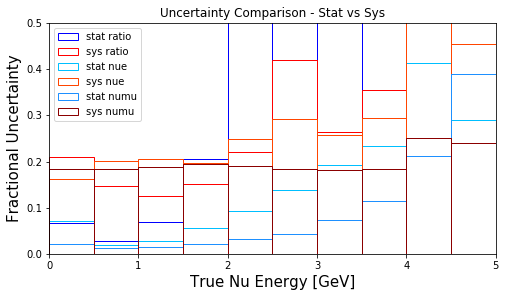

In [94]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]


nue_stat_weights = np.sqrt(np.diag(nue_cov_mc_stat))/n_nue_tot_allsel
nue_sys_weights = np.sqrt(np.diag(nue_cov))/n_nue_tot_allsel
numu_stat_weights = np.sqrt(np.diag(numu_cov_mc_stat))/n_numu_tot_allsel
numu_sys_weights = np.sqrt(np.diag(numu_cov))/n_numu_tot_allsel
ratio_stat_weights = np.sqrt(np.diag(ratio_cov_mc_stat))/rbin_allsel_ratios
ratio_sys_weights = np.sqrt(np.diag(ratio_cov))/rbin_allsel_ratios


sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Stat vs Sys")
errors_r_ax1.set_xlim([0, 5])
errors_r_ax1.set_ylim([0, 0.5])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [36]:
#errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_recoE_fraclog_consistent.pdf")

In [95]:
ratio_bins = np.arange(0, 5.5, 0.5)
ratio_bincenters = np.arange(0.25, 5.25, 0.5)
ratio_bin_edges = np.arange(0, 5.5, 0.5)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_allsel_ratios

print(ratio_n_tot)
print("")
print("error")
print(ratio_exp_err)
print("")
ratio_frac_err = ratio_exp_err / ratio_n_tot
print(ratio_frac_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(ratio_n_tot-ratio_exp_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 5])

[0.05906252479322565, 0.04871843242723391, 0.030038877275993903, 0.01682057016326682, 0.014089981962374895, 0.007618870353576273, 0.009192517228069387, 0.009387671739357777, 0.003922306605873838, 0.009715051890580662]

error
[0.01504501 0.01136059 0.01017913 0.009234   0.01311877 0.01923413
 0.04145802 0.0585707  0.04554997 0.03896226]

[ 0.25473026  0.2331888   0.33886515  0.54897042  0.93107089  2.5245381
  4.50997465  6.23910797 11.61305585  4.0105045 ]


(0, 5)

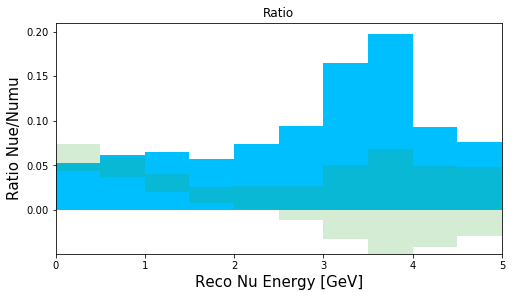

In [96]:
ratio_fig


In [39]:
ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_recoE.pdf")

In [97]:
nue_bin_edges = np.arange(0, 5.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = nue_exp_err / n_nue_tot_allsel
print(nue_frac_err)

nue_allsel_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot_allsel-nue_exp_err))

[0.21545733 0.23545981 0.24157805 0.23903565 0.29190772 0.34481118
 0.34388254 0.395666   1.04361737 0.55250194]


<BarContainer object of 10 artists>

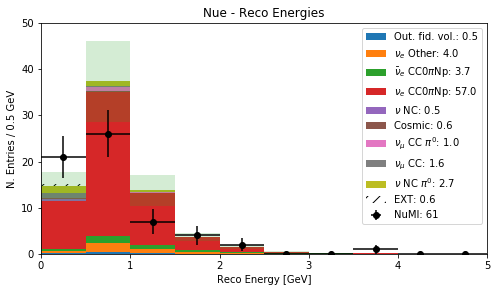

In [98]:
nue_allsel_fig

In [56]:
nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE.pdf")

In [99]:
numu_bin_edges = np.arange(0, 5.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot_allsel
print(numu_frac_err)

numu_allsel_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot_allsel-numu_exp_err))

[0.19958817 0.19807323 0.20263956 0.20809938 0.20504227 0.20127648
 0.20801543 0.2278642  0.33731196 0.46400448]


<BarContainer object of 10 artists>

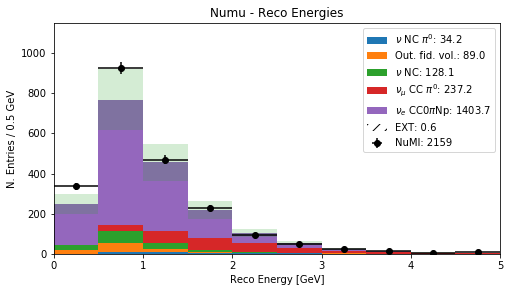

In [100]:
numu_allsel_fig

In [44]:
numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE.pdf")

(0, 1)

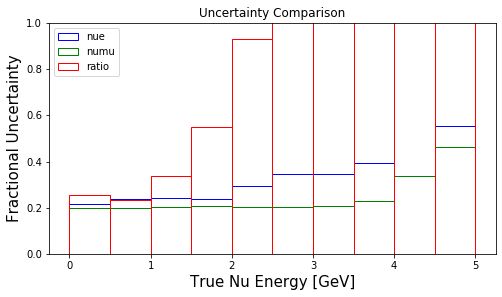

In [101]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
errors_ax1.set_ylim([0, 1])

In [64]:
errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_recoE.pdf")

## For Blockwise Unfolding

Data (MC) Values

In [102]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [1.04492241e+01 3.10782484e+01 1.11426725e+01 2.72081822e+00
 1.06264234e+00 3.26019952e-01 1.36951406e-01 5.99659714e-02
 9.51532401e-03 9.65695389e-03]


In [103]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [1.97757239e+02 5.03877125e+02 1.71203627e+02 4.71697681e+01
 1.43198401e+01 3.47640571e+00 8.27352946e-01 3.03658017e-01
 1.01967167e-01 1.26867741e-01]


In [104]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[1.04492241e+01 3.10782484e+01 1.11426725e+01 2.72081822e+00
 1.06264234e+00 3.26019952e-01 1.36951406e-01 5.99659714e-02
 9.51532401e-03 9.65695389e-03 1.97757239e+02 5.03877125e+02
 1.71203627e+02 4.71697681e+01 1.43198401e+01 3.47640571e+00
 8.27352946e-01 3.03658017e-01 1.01967167e-01 1.26867741e-01]
20


Text(0.5, 1.0, 'Nue, Numu, Data Selected Values')

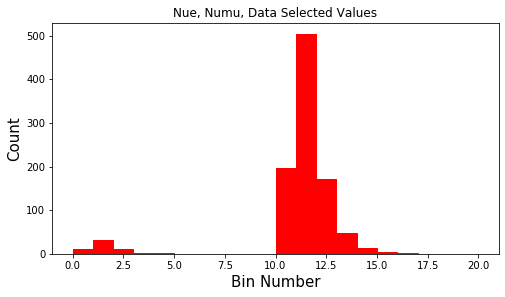

In [105]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

In [18]:
np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_07Jul.csv", 
           nue_numu_tot,
           delimiter =", ", 
           fmt ='% s')

Systematics

In [106]:
nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

#nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.set_index('entry')
nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")
#print(nue_nue_ppfx_detvar_dict)
#print(type(nue_nue_ppfx_detvar_dict))

nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')
#print(nue_nue_ppfx_detvar_dict)
#print(type(nue_nue_ppfx_detvar_dict))

#------------

nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_genie_detvar_dict.pop("Unnamed: 0")

nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

#------------

nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_reint_detvar_dict.pop("Unnamed: 0")

nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

#------------

nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_nue_geo_detvar_dict.pop("Unnamed: 0")

nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

#####################################################################################

nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

#---------------

nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_mc_genie_detvar_dict.pop("Unnamed: 0")

nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

#---------------

nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_mc_reint_detvar_dict.pop("Unnamed: 0")

nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

#---------------

nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_mc_geo_detvar_dict.pop("Unnamed: 0")

nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

#####################################################################################

nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

nue_dirt_ppfx_detvar_dict = nue_dirt_ppfx_detvar_dict.to_dict('series')

#---------------

nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

#---------------

nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

nue_dirt_reint_detvar_dict = nue_dirt_reint_detvar_dict.to_dict('series')

#---------------

nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

nue_dirt_geo_detvar_dict = nue_dirt_geo_detvar_dict.to_dict('series')

In [107]:
numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

#---------------------

numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_genie_detvar_dict.pop("Unnamed: 0")

numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

#---------------------

numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_reint_detvar_dict.pop("Unnamed: 0")

numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

#---------------------

numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_mc_geo_detvar_dict.pop("Unnamed: 0")

numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

#####################################################################################

numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

numu_dirt_ppfx_detvar_dict = numu_dirt_ppfx_detvar_dict.to_dict('series')

#---------------------

numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')

#---------------------

numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

numu_dirt_reint_detvar_dict = numu_dirt_reint_detvar_dict.to_dict('series')

#---------------------

numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_07Jul.csv")

numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

numu_dirt_geo_detvar_dict = numu_dirt_geo_detvar_dict.to_dict('series')

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


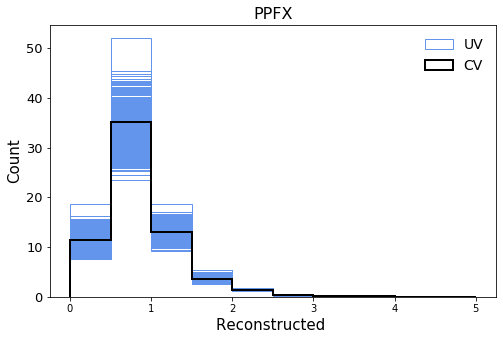

In [108]:
import matplotlib.pyplot as plt
import matplotlib




n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_nue_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/detsys_shr_energy_cali_fhc_intrinsic.pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


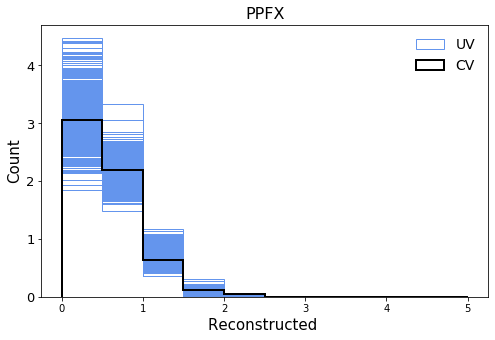

In [109]:
import matplotlib.pyplot as plt
import matplotlib




n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_mc_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/detsys_shr_energy_cali_fhc_intrinsic.pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


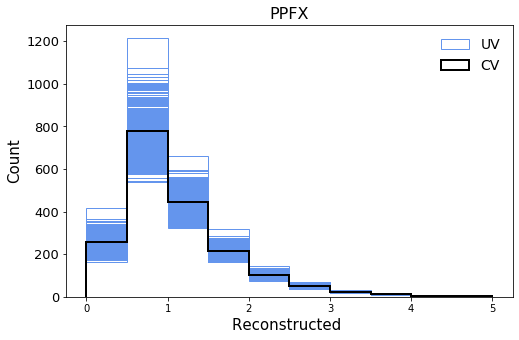

In [110]:
import matplotlib.pyplot as plt
import matplotlib



n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in numu_mc_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/detsys_shr_energy_cali_fhc_intrinsic.pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

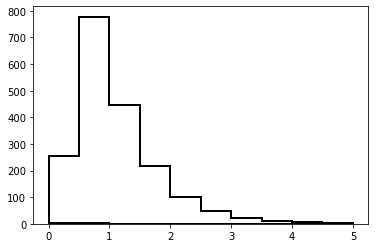

In [111]:
nue_mc_CV = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

numu_mc_CV = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

nue_numu_mc_CV = np.concatenate((nue_mc_CV[0], numu_mc_CV[0]), axis=0)
#print(nue_numu_mc_tot)

Text(0.5, 1.0, 'Nue, Numu, Values')

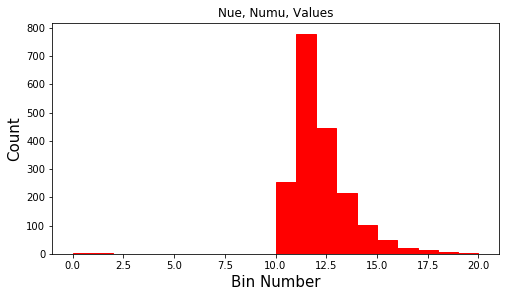

In [112]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_mc_CV)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 0.01])

In [113]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

Mc dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


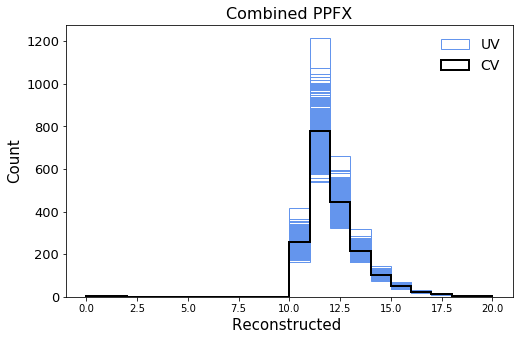

In [114]:
################
####ppfx########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [115]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[3.060250997543335, 2.1896770000457764, 0.6295416355133057, 0.11053932458162308, 0.05357301980257034, 0.0, 0.0, 0.0, 0.0, 0.0, 255.40151977539062, 777.8792114257812, 445.5033874511719, 216.85610961914062, 100.91326141357422, 48.924800872802734, 21.829912185668945, 12.027737617492676, 5.756373405456543, 3.2653543949127197]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500


In [116]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/3322636866.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/3322636866.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


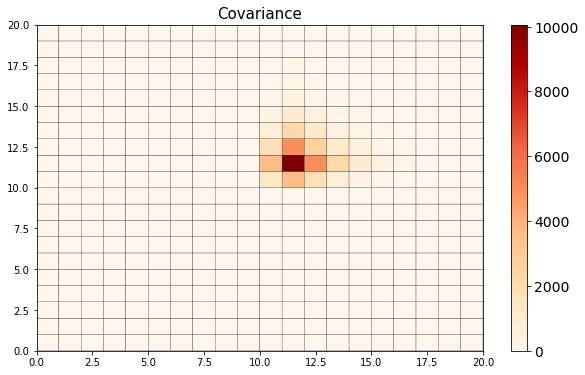

In [117]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


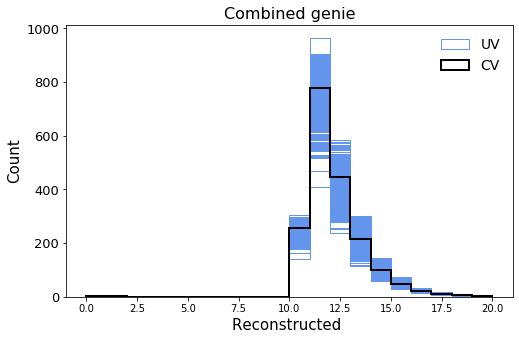

In [118]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [119]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [120]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/2988810523.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/2988810523.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


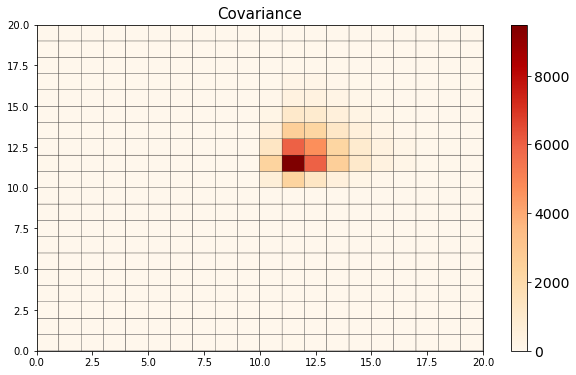

In [121]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


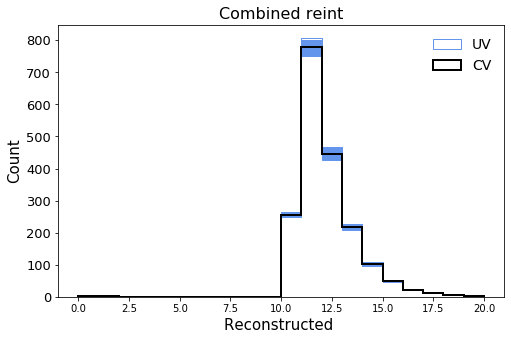

In [122]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [123]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [124]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/1565887044.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/1565887044.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


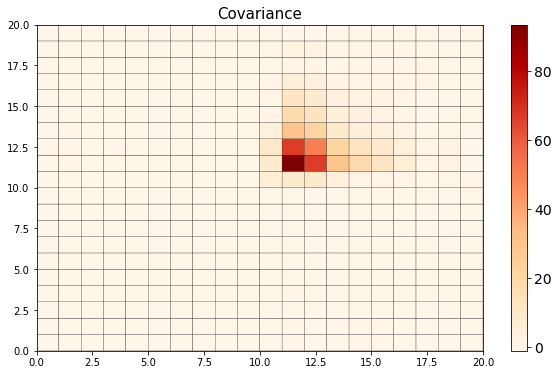

In [125]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


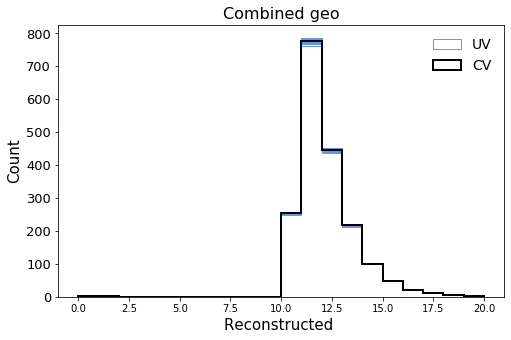

In [126]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [127]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [128]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/2755882043.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/2755882043.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


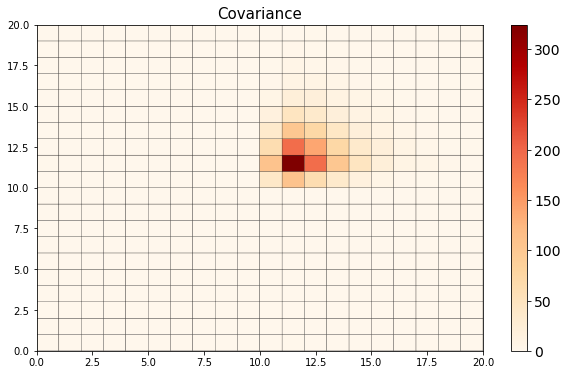

In [129]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

##geo will need different CV values for each one

Dirt dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


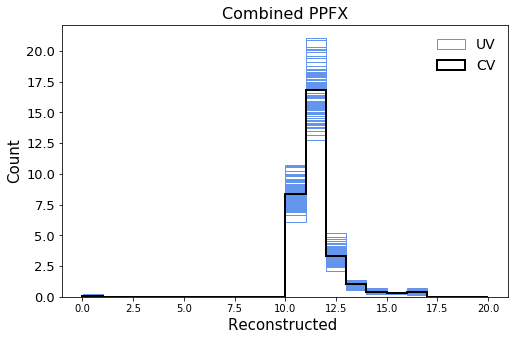

In [130]:
################
####ppfx########
################

import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_ppfx_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_ppfx_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [131]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [132]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/2387508921.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/2387508921.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


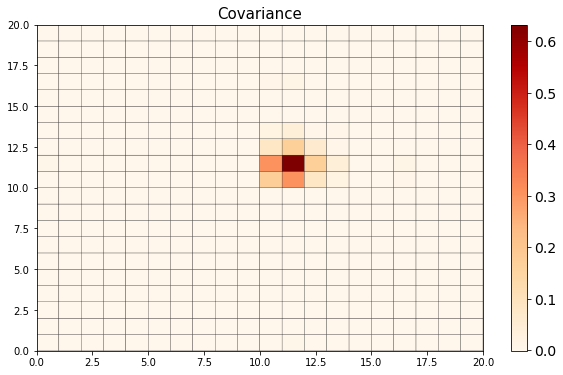

In [133]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [135]:
detsys_dict_dirt_ppfx['cov']

[[0.00038745410229088726,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0010864849434682412,
  0.0034403748250636133,
  0.0005134016192924638,
  0.00036256074658859097,
  9.536548569323019e-05,
  7.099153645034092e-05,
  -0.00011397299550961638,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


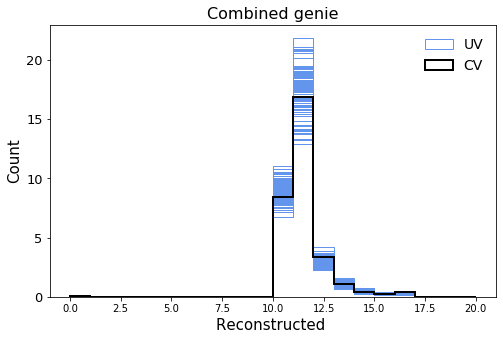

In [136]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [137]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500


In [138]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/1668627413.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/1668627413.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


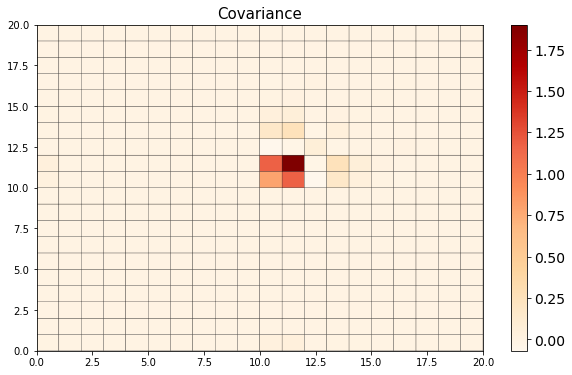

In [139]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


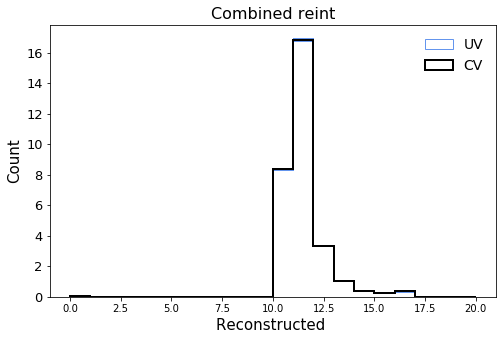

In [140]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

#print(numu_dirt_reint_detvar_dict.keys())

for variation in nue_dirt_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [141]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [142]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/3434269430.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/3434269430.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


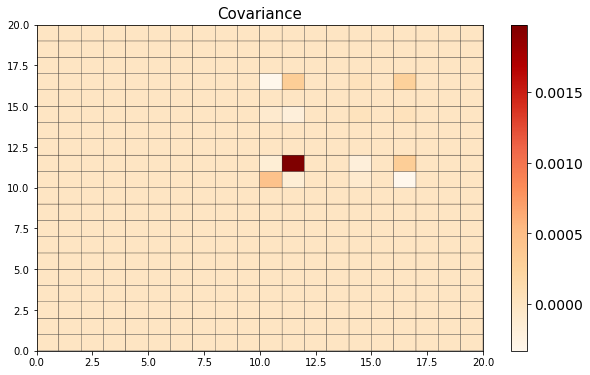

In [143]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


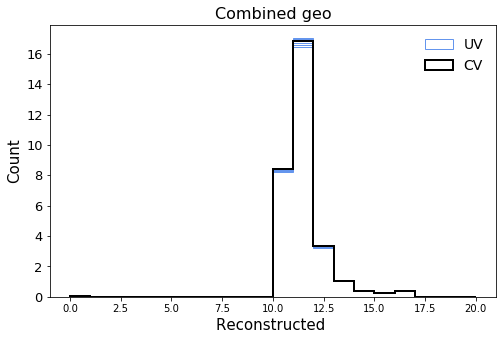

In [144]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [145]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [146]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/2150283862.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/2150283862.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


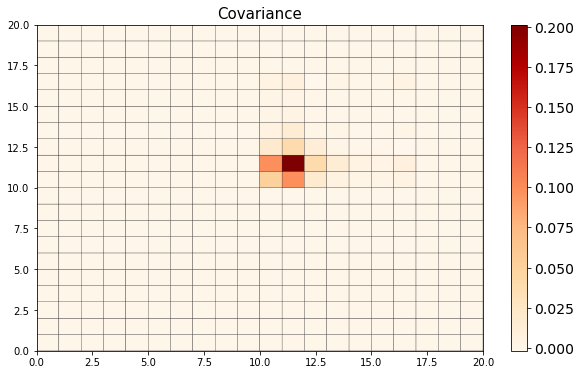

In [147]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



Nue Dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


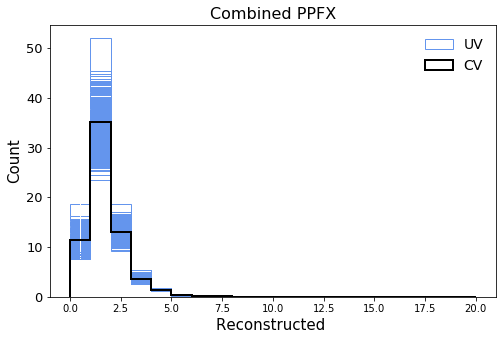

In [148]:
################
####ppfx########
################

import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_nue_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_ppfx_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [149]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [150]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
}

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/1244847139.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/1244847139.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


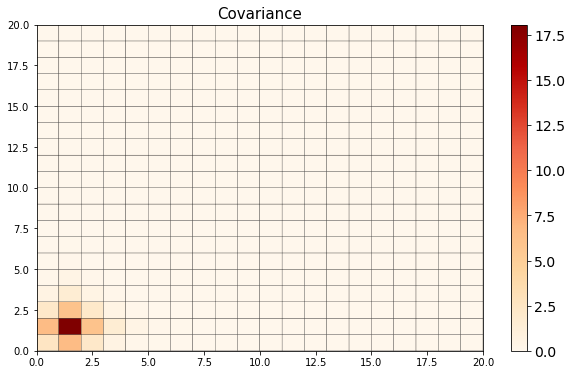

In [151]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


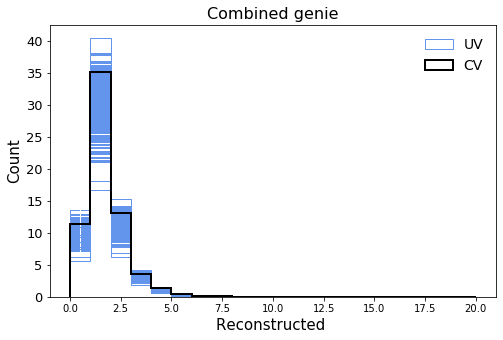

In [152]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_nue_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_genie_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [153]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500


In [154]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/621654353.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/621654353.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


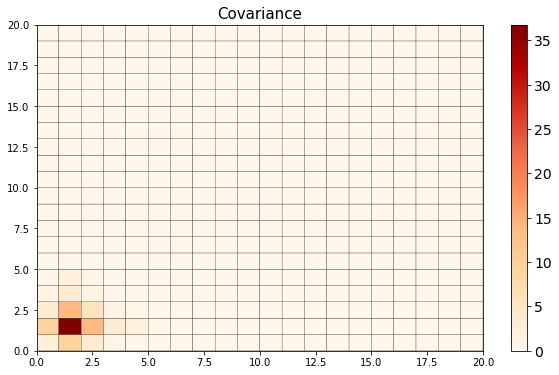

In [155]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


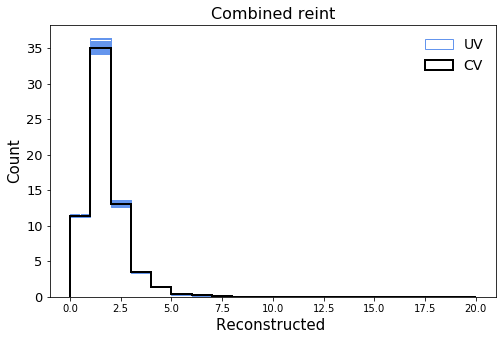

In [156]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

#print(numu_dirt_reint_detvar_dict.keys())

for variation in nue_nue_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_reint_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [157]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [158]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/2425260978.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/2425260978.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


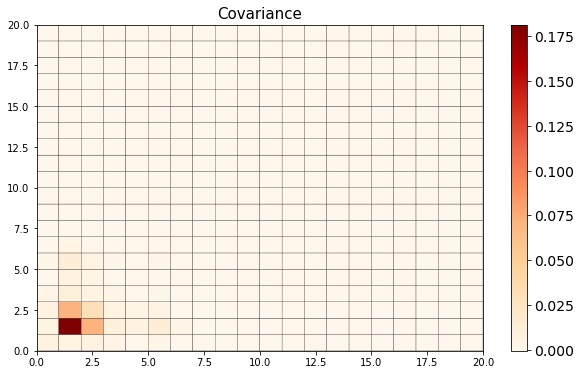

In [159]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


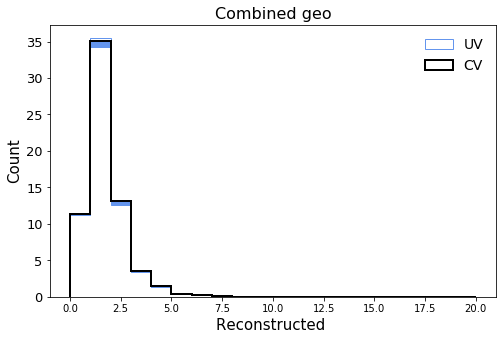

In [160]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_geo_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [161]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [162]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_72043/926596170.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_72043/926596170.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


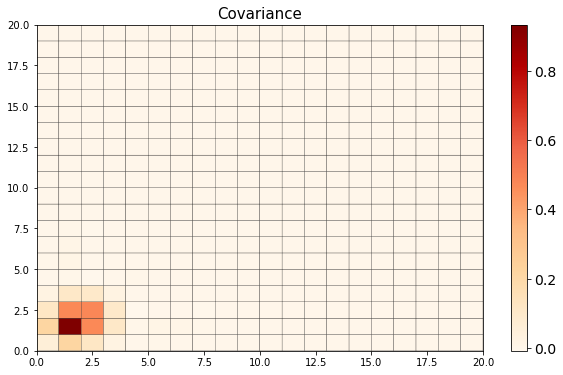

In [163]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [164]:
nue_df_total_cov = np.array(detsys_dict_nue_ppfx['cov']) + np.array(detsys_dict_nue_genie['cov']) + np.array(detsys_dict_nue_reint['cov']) + np.array(detsys_dict_nue_geo['cov'])
dirt_df_total_cov = np.array(detsys_dict_dirt_ppfx['cov']) + np.array(detsys_dict_dirt_genie['cov']) + np.array(detsys_dict_dirt_reint['cov']) + np.array(detsys_dict_dirt_geo['cov'])
mc_df_total_cov = np.array(detsys_dict_mc_ppfx['cov']) + np.array(detsys_dict_mc_genie['cov']) + np.array(detsys_dict_mc_reint['cov']) + np.array(detsys_dict_mc_geo['cov'])

In [165]:
sys_total_cov = nue_df_total_cov + dirt_df_total_cov + mc_df_total_cov

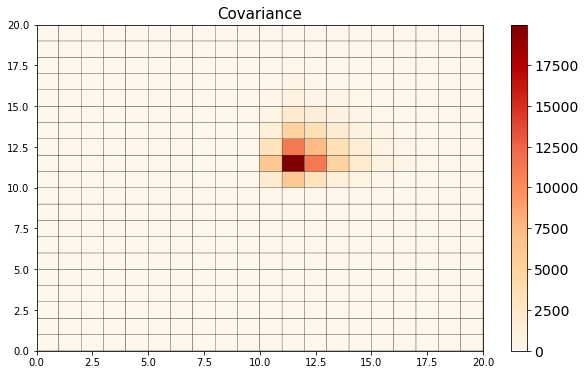

In [166]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, sys_total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [167]:
#nue_cov_mc_stat and numu_cov_mc_stat

nue_stats = np.diag(nue_cov_mc_stat)
numu_stats = np.diag(numu_cov_mc_stat)

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[1.09394831e+00 4.84245704e-01 1.48942643e-01 4.27974843e-02
 1.79338192e-02 3.18207211e-03 1.62639241e-03 7.77839848e-04
 7.07127135e-05 7.07127135e-05 2.96715098e+01 7.83161005e+01
 4.39197012e+01 2.25562879e+01 1.07721899e+01 5.11909085e+00
 2.70957425e+00 2.14382508e+00 1.21073414e+00 1.35251856e+00]


In [168]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [169]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_stats

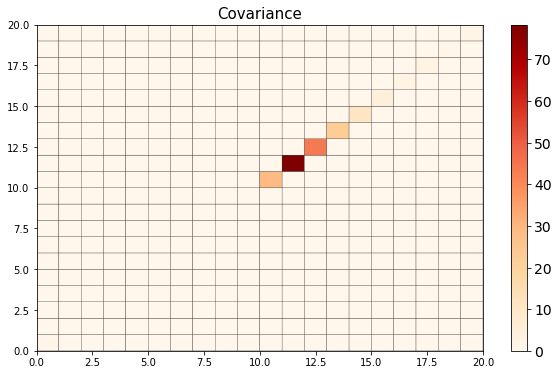

In [170]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [171]:
nue_detsys = np.diag(nue_cov_mc_detsys)
numu_detsys = np.diag(numu_cov_mc_detsys)

nue_numu_detsys = np.concatenate((np.array(nue_detsys), np.array(numu_detsys)), axis=0)

#print(nue_numu_detsys)

In [172]:
nue_numu_cov_detsys   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [173]:
nue_numu_cov_detsys[np.diag_indices_from(nue_numu_cov_detsys)]   = nue_numu_detsys

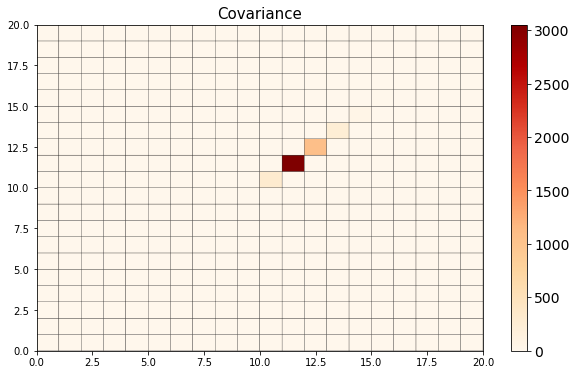

In [174]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_detsys, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [175]:
total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys
print(total_cov)

[[ 9.97809600e+00  1.63942348e+01  5.98598854e+00  1.46531865e+00
   6.40120139e-01  1.86091919e-01  7.92912579e-02  2.59754933e-02
   2.09261773e-03  6.35521703e-04  2.24187748e+01  7.37762297e+01
   3.93608679e+01  1.61954068e+01  6.61675555e+00  2.75162976e+00
   9.73338366e-01  3.00189936e-01  3.64486915e-01  6.35630577e-02]
 [ 1.63942348e+01  7.74459079e+01  2.06400107e+01  4.95187292e+00
   2.44451498e+00  6.05237602e-01  2.35656015e-01  8.13613733e-02
   6.98255553e-03  3.41767686e-03  1.16870778e+01  3.97261277e+01
   2.81979462e+01  1.44424072e+01  6.46522040e+00  3.12726114e+00
   1.15441932e+00  6.27747800e-01  3.22304314e-01  1.29182444e-01]
 [ 5.98598854e+00  2.06400107e+01  1.09980074e+01  1.88681718e+00
   9.00751744e-01  2.22116852e-01  8.49345306e-02  2.78618982e-02
   2.63608070e-03  2.31430395e-03  6.09724939e+00  2.00782282e+01
   1.13196406e+01  5.20204310e+00  2.45196333e+00  1.14665709e+00
   4.74682544e-01  2.09583272e-01  1.76036409e-01  5.48636285e-02]
 [ 1.46

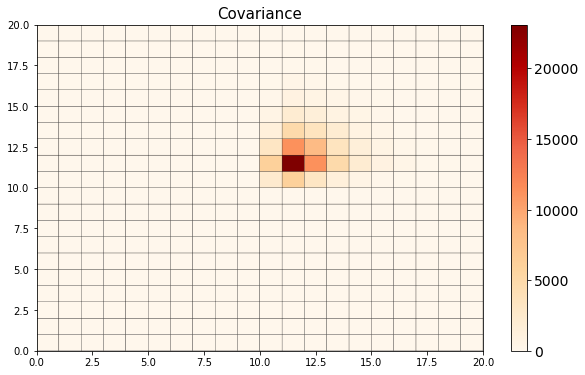

In [176]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [177]:
np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_07Jul.csv", 
           total_cov,
           delimiter =", ", 
           fmt ='% s')

### Smearing

In [178]:
import csv

with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(nue_smearing[a])
    for b in range(len(nue_smearing[a])):
        nue_smearing[a][b] = float(nue_smearing[a][b])
    
print("nue_smearing = ", nue_smearing)

nue_smearing =  [[0.12466415299372549, 0.04890644506825696, 0.007966207243607757, 0.0032354994021425716, 0.0004241689252878732, 0.0, 0.0, 0.0, 0.0, 0.0], [0.005005970309748213, 0.15960753882656026, 0.0915164500025175, 0.028518400466941162, 0.013920151276060002, 0.005136808009638805, 0.004806613843914598, 0.008522735452252768, 0.0, 0.0], [0.0, 0.003046155289956584, 0.08094181566457533, 0.061224072535116913, 0.029672109701886825, 0.01970692059154062, 0.0, 0.004768202030499237, 0.009736293121996416, 0.0], [0.0, 0.0, 0.001793929956276731, 0.04025905335401571, 0.049508970732280166, 0.01634248639836829, 0.023257573405533128, 0.00963182019361106, 0.009697789818053677, 0.0], [0.0, 0.0, 0.0, 0.0021152132263746832, 0.04245864390627867, 0.029597669638141286, 0.015739033612669755, 0.01999537450688388, 0.015888227201954465, 0.022196432844323304], [0.0, 0.0, 0.0, 0.0, 0.003515522309387695, 0.01870110778068062, 0.013718725750549372, 0.02306246347023914, 0.016392711097363618, 0.025925370591196848], [0

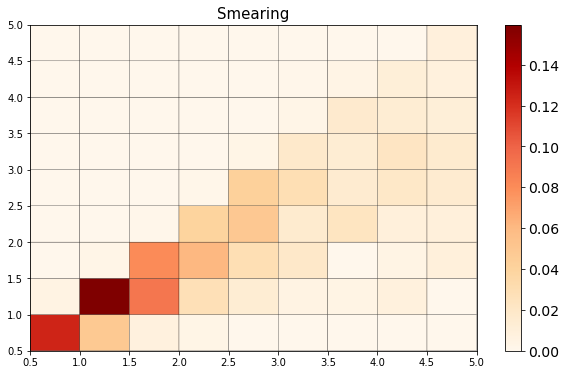

In [179]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.5, 5.5, 0.5)
        
plt.pcolor(bins, bins, nue_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [180]:
with open('numu_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    numu_smearing[a] = list(numu_smearing[a])
    for b in range(len(numu_smearing[a])):
        numu_smearing[a][b] = float(numu_smearing[a][b])
    
print("numu_smearing = ", numu_smearing)

numu_smearing =  [[0.14833580880983935, 0.021623647136565848, 0.001273551319824713, 0.00033498192324054834, 0.0003802963892933114, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05787251410913461, 0.18429086530179264, 0.0274488981280672, 0.011040205512971824, 0.00423058197087391, 0.003527365271627193, 0.002832434042734398, 0.0027601947008913247, 0.007325508024332474, 0.0], [0.001671179705393752, 0.02429793187183309, 0.05603563781197268, 0.01686922805656981, 0.010479657932119652, 0.00860865602233, 0.00602210230288567, 0.0026268649641423, 0.006951152233024994, 0.0034272195559413195], [0.00016351315407646592, 0.002322932657895316, 0.008881289534676044, 0.019835908917937586, 0.008399849223709826, 0.005580322099771587, 0.004494212249696089, 0.004968957670384791, 0.0, 0.01675650101844993], [0.00012895473639059612, 0.00031128531797541804, 0.0020209287827070337, 0.004355907559809954, 0.008373966290138857, 0.0012789550766103084, 0.008078114018865655, 0.002242566151698618, 0.008492152947756144, 0.0058219646518758

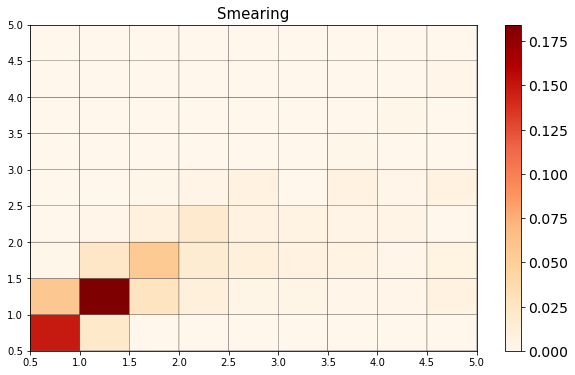

In [181]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.5, 5.5, 0.5)
        
plt.pcolor(bins, bins, numu_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [182]:
#nue_smearing#

zeros = [0]*10

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(np.concatenate(((nue_smearing[a]), zeros), axis=0))

    
for a in range(len(numu_smearing)):
    numu_smearing[a] = list(np.concatenate((zeros, ((numu_smearing[a]))), axis=0))   

In [185]:
full_smear = nue_smearing + numu_smearing
print(nue_smearing)

[[0.12466415299372549, 0.04890644506825696, 0.007966207243607757, 0.0032354994021425716, 0.0004241689252878732, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.005005970309748213, 0.15960753882656026, 0.0915164500025175, 0.028518400466941162, 0.013920151276060002, 0.005136808009638805, 0.004806613843914598, 0.008522735452252768, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.003046155289956584, 0.08094181566457533, 0.061224072535116913, 0.029672109701886825, 0.01970692059154062, 0.0, 0.004768202030499237, 0.009736293121996416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.001793929956276731, 0.04025905335401571, 0.049508970732280166, 0.01634248639836829, 0.023257573405533128, 0.00963182019361106, 0.009697789818053677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0021152132263746832, 0.04245864390627867, 0.029597669638141286, 0.015739033612669755, 0.01999537450688388, 0.0158882272019

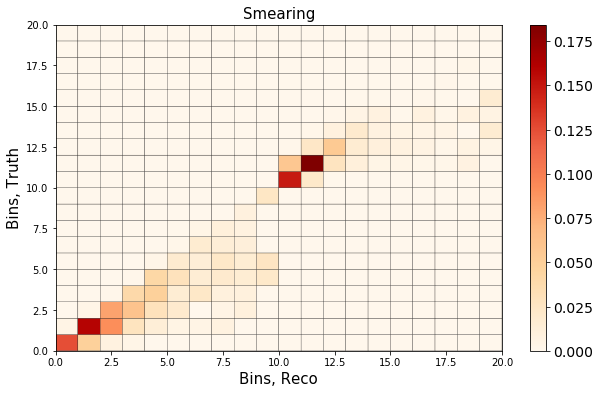

In [186]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
        
plt.pcolor(bins_full, bins_full, full_smear, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [187]:
np.savetxt("full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_blockwise_recoCut_07Jul.csv", 
           full_smear,
           delimiter =", ", 
           fmt ='% s')